In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Содержание</h1>
<div id="toc"></div>

# Импорт

Установка для чтения формата .sav

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


Установка hyperopt для подбора гиперпараметров моделей

In [3]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


Импорт библиотек для работы

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, Trials
from joblib import dump, load

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

Установка отображения 287 столбцов

In [5]:
pd.set_option('display.max_columns', 287)

Игнорирование предупреждений

In [6]:
import warnings
warnings.simplefilter('ignore')

Отображение числовых значений до двух знаков после запятой

In [7]:
pd.set_option('display.float_format', '{:,.2f}'.format)

# Загрузка данных

In [8]:
data = pd.read_spss(
    path = '/Users/kosinskiimacbook/Downloads/База данных с результатами исследования_2021.sav',
    usecols=None, convert_categoricals=True
)

Функция для ознакомления с данными

In [9]:
def reader(data):
    display(data.head(3))
    display(data.tail(3))
    display(data.info())
    display(data.shape)
    print('-----')
    
    for i in range(len(data.columns)):
        display((data[data.columns[i]].value_counts()))
        print('=====')

In [10]:
reader(data)

,ID,ID_RGD,date,Железнаядорога,Функциональныйфилиал,СЛУЖБАХОЗЯЙСТВОЦДИ,Вышестоящееподразделение,Подразделение,Категориясотрудников,C10_text,C5_text,Должность,Пол,Возраст,Стажнажд,Образование,C1,C2,C3,C4,C6,C5,C7,C8,C9,C10,Q2,Q3,Q39,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q41,Q42,Q43,Q44,Q106,Q45,Q46,Q47,Q48,Q49,Q107,Q50.1,Q50.2,Q51.1,Q51.2,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q108,Q62,Q63,Q109,Q64,Q65,Q66,Q67,Q69,Q110,Q111,Q73,Q74,Q75,Q112,Q113,Q76,Q78,Q79,Q81,Q77,Q80.1,Q80.2,Q83,Q84,Q85,Q86,Q88,Q89,Q90,Q93,Q94,Q114,Q96,Q97,Q98,Q115,Q99,Q100,Q101,Q102,Q103,Q105.1,Q105.2,IID,wgt1,wgt2,wgt3,wgt4,wgt5,wgt6,wgt7,rgd,q1Tb,q2Tb,q3Tb,q5Tb,q6Tb,q7Tb,q8Tb,q9Tb,q10Tb,q11Tb,q13Tb,q12Tb,QM2,QN3,QM39,QN39,QNPS39,vovl1,vovl2,vovl3,vovl4,QN4,QN5,QN6,QN7,QN8,QN9,vovl111,vovl222,vovl333,QN24,QN25,QN26,QN27,QN28,QN29,QN30,QN31,QN32,QN33,QN34,QN35,QN36,QN37,CSI,CSI_W,QQ50.1,QQ50.2,QQ51.1,QQ51.2,QQ55,QQ67,QQ69,QQ74,QQ112,QQ113,QB41,QB42,QB43,QB44,QB106,QB45,QB46,QB47,QB48,QB49,QB107,QB50.1,QB50.2,QB51.1,QB51.2,QB53,QB54,QB55,QB56,QB57,QB58,QB59,QB60,QB61,QB108,QB62,QB63,QB109,QB64,QB65,QB66,QB67,QB69,QB110,QB111,QB73,QB74,QB75,QB112,QB113,QB76,QB78,QB79,QB81,QB77,QB80.1,QB80.2,QB83,QB84,QB85,QB86,QB88,QB89,QB90,QB93,QB94,QB114,QB96,QB97,QB98,QB115,QB99,QB100,QB101,QB102,QB103,QB105.1,QB105.2,hh_Q4_9,hh_Q10_37,hh41_45,hh46_51,hh53_57,hh58_108,hh62_109,hh64_69,hh110_111,hh73_75,hh112_113,hh76_81,hh77_80,hh83_86,hh88_90,hh93_96,hh97_100,hh101_105,C2_1,C4_1,С99,Машинисты,Вес_категории
0,1.00,"4,389.00",01.01.2022,Северная,ЦТ,,ТЧЭ-10 Череповец,Участок эксплуатации,Служащие,Северная Т,"Нарядчик локомотивных бригад, оператор при деж...",Нарядчик локомотивных бригад,женский,51-60,11 – 20 лет,Высшее образование,Северная,Дирекция тяги (ЦТ),NaN,Служащие,Женский,"Нарядчик локомотивных бригад, оператор при деж...",51-60 лет,11-20 лет,Высшее образование,Северная Т,9.00,Более 10 лет,9.00,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Сильно влияет,Сильно влияет,Сильно влияет,Сильно влияет,Сильно влияет,Сильно влияет,Сильно влияет,Влияет в некоторой степени,Сильно влияет,Сильно влияет,Влияет в некоторой степени,Влияет в некоторой степени,Сильно влияет,Сильно влияет,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Полностью согласен,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,NaN,NaN,NaN,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,Полностью согласен,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,Полностью согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,,0.43,0.75,2.90,NaN,0.40,0.54,0.37,-,СЕВ,ЦТ,NaN,Служащие,Женский,51-60 лет,36 лет и старше,11-20 лет,более 10 лет,Высшее образование,"Нарядчик локомотивных бригад, оператор при деж...",Северная Т,80%,8 и более лет,8,Нейтральные,Нейтральные,0.00,0.00,63.33,1.00,60.00,60.00,60.00,60.00,80.00,60.00,60.00,60.00,70.00,66.67,66.67,66.67,100.00,66.6

,ID,ID_RGD,date,Железнаядорога,Функциональныйфилиал,СЛУЖБАХОЗЯЙСТВОЦДИ,Вышестоящееподразделение,Подразделение,Категориясотрудников,C10_text,C5_text,Должность,Пол,Возраст,Стажнажд,Образование,C1,C2,C3,C4,C6,C5,C7,C8,C9,C10,Q2,Q3,Q39,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q41,Q42,Q43,Q44,Q106,Q45,Q46,Q47,Q48,Q49,Q107,Q50.1,Q50.2,Q51.1,Q51.2,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q108,Q62,Q63,Q109,Q64,Q65,Q66,Q67,Q69,Q110,Q111,Q73,Q74,Q75,Q112,Q113,Q76,Q78,Q79,Q81,Q77,Q80.1,Q80.2,Q83,Q84,Q85,Q86,Q88,Q89,Q90,Q93,Q94,Q114,Q96,Q97,Q98,Q115,Q99,Q100,Q101,Q102,Q103,Q105.1,Q105.2,IID,wgt1,wgt2,wgt3,wgt4,wgt5,wgt6,wgt7,rgd,q1Tb,q2Tb,q3Tb,q5Tb,q6Tb,q7Tb,q8Tb,q9Tb,q10Tb,q11Tb,q13Tb,q12Tb,QM2,QN3,QM39,QN39,QNPS39,vovl1,vovl2,vovl3,vovl4,QN4,QN5,QN6,QN7,QN8,QN9,vovl111,vovl222,vovl333,QN24,QN25,QN26,QN27,QN28,QN29,QN30,QN31,QN32,QN33,QN34,QN35,QN36,QN37,CSI,CSI_W,QQ50.1,QQ50.2,QQ51.1,QQ51.2,QQ55,QQ67,QQ69,QQ74,QQ112,QQ113,QB41,QB42,QB43,QB44,QB106,QB45,QB46,QB47,QB48,QB49,QB107,QB50.1,QB50.2,QB51.1,QB51.2,QB53,QB54,QB55,QB56,QB57,QB58,QB59,QB60,QB61,QB108,QB62,QB63,QB109,QB64,QB65,QB66,QB67,QB69,QB110,QB111,QB73,QB74,QB75,QB112,QB113,QB76,QB78,QB79,QB81,QB77,QB80.1,QB80.2,QB83,QB84,QB85,QB86,QB88,QB89,QB90,QB93,QB94,QB114,QB96,QB97,QB98,QB115,QB99,QB100,QB101,QB102,QB103,QB105.1,QB105.2,hh_Q4_9,hh_Q10_37,hh41_45,hh46_51,hh53_57,hh58_108,hh62_109,hh64_69,hh110_111,hh73_75,hh112_113,hh76_81,hh77_80,hh83_86,hh88_90,hh93_96,hh97_100,hh101_105,C2_1,C4_1,С99,Машинисты,Вес_категории
79284,"60,008.00","40,412.00",20.01.2022,Дальневосточная,Трансэнерго,,ЭЧ-2 Хабаровск,Корфовский район контактной сети (I гр),Специалисты,Дальневосточная НТЭ,"Электромеханик (всех наименований, кроме элект...",Старший электромеханик,мужской,26-30,6-10 лет,Высшее образование,Дальневосточная,Трансэнерго (ТЭ),NaN,Специалисты,Мужской,"Электромеханик (всех наименований, кроме элект...",26-30 лет,6-10 лет,Высшее образование,Дальневосточная НТЭ,9.00,Более 10 лет,9.00,NaN,NaN,Согласен,Скорее согласен,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Скорее удовлетворен,NaN,NaN,Скорее удовлетворен,NaN,NaN,NaN,NaN,NaN,NaN,Скорее удовлетворен,NaN,NaN,NaN,NaN,Скорее согласен,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,Скорее согласен,NaN,Полностью согласен,Скорее согласен,NaN,Полностью согласен,Скорее согласен,Полностью согласен,NaN,NaN,NaN,NaN,Скорее НЕ согласен,NaN,NaN,NaN,NaN,Полностью согласен,NaN,NaN,NaN,NaN,Полностью согласен,NaN,NaN,Полностью согласен,NaN,NaN,NaN,NaN,Полностью согласен,Скорее согласен,NaN,Полностью согласен,NaN,NaN,Полностью согласен,NaN,Полностью согласен,NaN,NaN,Полностью согласен,Полностью согласен,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Полностью согласен,NaN,Полностью согласен,e772fe32-4392-4aef-9ed9-9d8fde6084d7,1.94,1.21,0.76,NaN,2.30,1.70,1.82,-,ДВОСТ,ТЭ,NaN,Специалисты,Мужской,26-30 лет,35 лет и младше,6-10 лет,более 10 лет,Высшее образование,"Электромеханик (всех наименований, кроме элект...",Дальневосточная НТЭ,80%,8 и более лет,8,Нейтральные,Нейтральные,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Есть потребность в доставке до места производс...,NaN,Я обращался за получением льгот,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.69
79285,"65,047.00","3,671.00",23.12.2021,Северная,ЦМ,,МЧ-6 Котлас,Великоустюгский производственный участок,Руководители,Северная ДМ,Руководитель среднего звена линейных подраздел...,Мастер участка производства,мужской,41-45,4-5 лет,Среднее профессиональное образование,Северная,Центральная дирек

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79287 entries, 0 to 79286
Columns: 287 entries, ID to Вес_категории
dtypes: category(141), float64(131), object(15)
memory usage: 99.2+ MB


None

(79287, 287)

-----


17,653.00    1
29,724.00    1
77,075.00    1
51,061.00    1
7,127.00     1
            ..
33,915.00    1
29,274.00    1
45,101.00    1
52,920.00    1
29,649.00    1
Name: ID, Length: 79287, dtype: int64

=====


205.00       6
113.00       6
308.00       6
149.00       6
212.00       6
            ..
35,968.00    1
25,214.00    1
38,997.00    1
19,286.00    1
37,918.00    1
Name: ID_RGD, Length: 40072, dtype: int64

=====


18.01.2022    6565
13.01.2022    6334
14.01.2022    5316
19.01.2022    4861
17.01.2022    4753
27.12.2021    3936
28.12.2021    3824
15-01-2022    2808
12.01.2022    2663
18-01-2022    2126
16-01-2022    1960
22.12.2021    1904
24.12.2021    1870
23.12.2021    1817
29.12.2021    1787
17-01-2022    1770
20.01.2022    1726
19-01-2022    1689
11.01.2022    1682
14-01-2022    1613
21.12.2021    1489
15.01.2022    1349
10.01.2022    1218
16.01.2022    1087
20.12.2021    1048
16.12.2021     891
14.12.2021     859
25.12.2021     703
15.12.2021     681
13.12.2021     681
17.12.2021     660
08.12.2021     649
06.12.2021     638
26.12.2021     613
09.12.2021     587
07.12.2021     560
04.12.2021     539
05.12.2021     531
10.12.2021     487
03.12.2021     344
19.12.2021     332
18.12.2021     332
30.12.2021     217
08.01.2022     217
09.01.2022     215
05.01.2022     203
04.01.2022     187
11.12.2021     164
06.01.2022     147
07.01.2022     141
03.01.2022     134
12.12.2021     128
02.01.2022  

=====


Западно-Сибирская         8874
Северная                  8858
Октябрьская               7364
Северо-Кавказская         6268
Горьковская               5002
Свердловская              4777
Куйбышевская              4707
Дальневосточная           4656
Московская                4627
Красноярская              4430
Южно-Уральская            4245
Приволжская               3994
Юго-Восточная             3459
Забайкальская             3249
Восточно-Сибирская        2919
Центральное подчинение    1107
Калининградская            751
Name: Железнаядорога, dtype: int64

=====


ЦДИ                                  18956
ЦТ                                   13784
ЦД                                    9509
Подразделения РЦКУ железных дорог     7103
ЦСС                                   4442
ЦДРП                                  3694
ЦДТВ                                  3419
Трансэнерго                           2882
ЦФТО                                  2215
ГВЦ                                   2179
Желдоручет                            1902
ЦДМВ                                  1891
ДЖВ                                   1466
ЦТР                                   1331
ЦДЗС                                   956
ЦДПО                                   863
ЦМ                                     794
ДКРС                                   384
ДКРЭ                                   384
ДКСС                                   285
ДОСС                                   255
Аппарат управления                     205
ЦДЗ                                    204
Другие подр

=====


                                                                  60331
Служба пути и сооружений (П)                                       8520
Служба автоматики и телемеханики (Ш)                               3659
Служба вагонного хозяйства (В)                                     2842
Дирекция по эксплуатации путевых машин (ЦДИМ)                      1539
Центр диагностики и мониторинга устройств инфраструктуры (ЦДМ)     1370
Орган управления Центральной/региональной дирекции инфрастру       1026
Name: СЛУЖБАХОЗЯЙСТВОЦДИ, dtype: int64

=====


Северо-Кавказская ДТВ          513
Московская ДТВ                 398
ТЧЭ-2 НИЖНЕУДИНСК              368
ТЧЭ-1 ЯРОСЛАВЛЬ-ГЛ.            324
Ярославский ДЦС                320
                              ... 
ШЧ-14 Рижско-Савеловская         1
ИЧ Лев Толстой II группа         1
ПЧМ Кочетовка                    1
ШЧ-10 Московско-Ярославская      1
ЦР                               1
Name: Вышестоящееподразделение, Length: 2186, dtype: int64

=====


                                            12012
Производственно-технический отдел            1539
Технический отдел                             728
Отдел экономики и финансов                    496
Отдел управления персоналом                   462
                                            ...  
Тындинский район электроснабжения               1
Бригада по об.уст.СЦБ Выя-Верхотур.(иск)        1
Бриг по обсл устр.СЦБ Паллас-Коммунист          1
Мостовая бригада № 3                            1
ДС Уда II (IV класса)                           1
Name: Подразделение, Length: 14438, dtype: int64

=====


Рабочие         37136
Специалисты     29812
Руководители     9874
Служащие         2465
Name: Категориясотрудников, dtype: int64

=====


Западно-Сибирская ДИ     3607
Октябрьская ДИ           2520
Северная Т               2089
Северо-Кавказская Т      2023
Северная ДИ              1998
                         ... 
Приволжская ДПО             4
Октябрьская ДКС             4
ЦДИМ собственно             2
Калининградская НС          2
Восточно-Сибирская ДМ       2
Name: C10_text, Length: 360, dtype: int64

=====


Инженер (всех категорий)                                                                                                                                                                         8020
Электромеханик (всех наименований, кроме электромеханика по средствам автоматики и приборамтехнологического оборудования)                                                                        6390
Руководитель среднего звена линейных подразделений/предприятий (начальники участков, мастера, начальники цехов, начальники и заместители начальников отделов ПЧ, ШЧ, ВЧД, ТЧ, ДС, РЦС и т.д.)    5522
Машинист электровоза/электропоезда                                                                                                                                                               4878
Монтер пути, контролер состояния ж.д. пути                                                                                                                                                       4749
          

=====


Электромеханик                              4928
Монтер пути                                 4574
Машинист электровоза (грузовое движение)    2952
Ведущий инженер                             2819
Дежурный по железнодорожной станции         2725
                                            ... 
Библиограф II категории                        1
Оператор окрасочно-суш. линии и агрегата       1
Антенщик-мачтовик                              1
Дозиметрист                                    1
Оператор установок пескоструйной очистк        1
Name: Должность, Length: 875, dtype: int64

=====


мужской    34178
женский    33134
Мужской    11974
Женский        1
Name: Пол, dtype: int64

=====


36-40        14210
31-35        13684
51-60        12732
41-45        12316
46-50        10962
26-30         8626
22-25         4271
Старше 60     1679
18-21          807
Name: Возраст, dtype: int64

=====


11 – 20 лет     40270
6-10 лет        14633
1-3 года         6055
4-5 лет          6027
11-20 лет        4742
Свыше 20 лет     3815
Менее 1 года     3729
                   16
Name: Стажнажд, dtype: int64

=====


Высшее образование                      41411
Среднее профессиональное образование    22688
Начальное профессиональное образован     6031
Среднее (полное) общее образование       5687
Основное (общее) образование             1880
Неполное высшее образование               647
Послевузовское образование                555
Начальное (общее) образование             224
                                          164
Name: Образование, dtype: int64

=====


Западно-Сибирская         8874
Северная                  8858
Октябрьская               7364
Северо-Кавказская         6268
Горьковская               5002
Свердловская              4777
Куйбышевская              4707
Дальневосточная           4656
Московская                4627
Красноярская              4430
Южно-Уральская            4245
Приволжская               3994
Юго-Восточная             3459
Забайкальская             3249
Восточно-Сибирская        2919
Центральное подчинение    1107
Калининградская            751
Name: C1, dtype: int64

=====


Центральная дирекция инфраструктуры (ЦДИ)                              18956
Дирекция тяги (ЦТ)                                                     13784
Центральная дирекция управления движением (ЦД)                          9509
Подразделения РЦКУ железных дорог                                       7103
Центральная станция связи (ЦСС)                                         4442
Центральная дирекция по ремонту пути (ЦДРП)                             3694
Центральная дирекция по тепловодоснабжению (ЦДТВ)                       3419
Трансэнерго (ТЭ)                                                        2882
Центр фирменного транспортного обслуживания (ЦФТО)                      2215
Главный вычислительный центр (ГВЦ)                                      2179
Центр корпоративного учета и отчетности 'Желдоручет' (ЖДУ)              1902
Центральная дирекция моторвагонного подвижного состава (ЦДМВ)           1891
Дирекция железнодорожных вокзалов (ДЖВ)                                 1466

=====


Служба пути и сооружений (П)                                      8520
Служба автоматики и телемеханики (Ш)                              3659
Служба вагонного хозяйства (В)                                    2842
Дирекция по эксплуатации путевых машин (ЦДИМ)                     1539
Дирекция диагностики и мониторинга инфраструктуры (ЦДМ)           1370
Орган управления Центральной/региональной дирекции инфраструкт    1026
Name: C3, dtype: int64

=====


Рабочие (всех разрядов), бригадиры    37136
Специалисты                           29812
Руководители                           9874
Служащие                               2465
Name: C4, dtype: int64

=====


Мужской    46152
Женский    33135
Name: C6, dtype: int64

=====


Инженер (всех категорий)                                            8020
Электромеханик (всех наименований, кроме электромеханика по сред    6390
Руководитель среднего звена линейных подразделений / предприяти     5522
Машинист электровоза / электропоезда                                4878
Монтер пути, контролер состояния ж.д. пути                          4749
                                                                    ... 
Инструктор                                                            73
Секретарь (всех наименований)                                         68
Машинист-инструктор (всех наименований)                               55
Стропальщик, такелажник                                               54
Нарядчик локомотивных бригад, оператор при дежурном по депо           54
Name: C5, Length: 63, dtype: int64

=====


36-40 лет        14210
31-35 лет        13684
51-60 лет        12732
41-45 лет        12316
46-50 лет        10962
26-30 лет         8626
22-25 лет         4271
старше 60 лет     1679
18-21 год          807
Name: C7, dtype: int64

=====


11-20 лет       45012
6-10 лет        14633
1-3 года         6055
4-5 лет          6027
свыше 20 лет     3815
Менее 1 года     3729
Name: C8, dtype: int64

=====


Высшее образование                        41411
Среднее профессиональное образование      22688
Начальное профессиональное образование     6031
Среднее (полное) общее образование         5687
Основное (общее) образование               1880
Неполное высшее образование                 647
Послевузовское образование                  555
Начальное (общее) образование               224
Name: C9, dtype: int64

=====


Западно-Сибирская ДИ     3607
Октябрьская ДИ           2520
Северная Т               2089
Северная ДИ              1998
Северная Д               1459
                         ... 
Октябрьская ДКС             4
Приволжская ДПО             4
ЦДИМ собственно             2
Калининградская НС          2
Восточно-Сибирская ДМ       2
Name: C10, Length: 360, dtype: int64

=====


11.00    15820
8.00     12797
9.00     12786
6.00     12436
10.00    10258
7.00      6162
4.00      2805
5.00      2470
2.00      1334
3.00      1230
1.00      1189
Name: Q2, dtype: int64

=====


Всю жизнь (до пенсии)    38771
Затрудняюсь ответить     18324
Более 10 лет             11169
5-7 лет                   2963
8-10 лет                  2804
3-4 года                  2235
1-2 года                  1666
Менее 1 года              1355
Name: Q3, dtype: int64

=====


11.00    17447
8.00     12550
10.00    12087
9.00     11760
6.00      7861
1.00      6029
7.00      3984
4.00      2685
5.00      1865
2.00      1657
3.00      1362
Name: Q39, dtype: int64

=====


Скорее согласен           26680
Согласен                  23026
Полностью согласен        12923
Скорее НЕ согласен        10655
НЕ согласен                3419
Совершенно НЕ согласен     1914
Name: Q4, dtype: int64

=====


Скорее согласен           25006
Согласен                  22840
Полностью согласен        12819
Скорее НЕ согласен        11187
НЕ согласен                4213
Совершенно НЕ согласен     2568
Name: Q5, dtype: int64

=====


Согласен                  25688
Скорее согласен           19467
Полностью согласен        16660
Скорее НЕ согласен         9454
НЕ согласен                5076
Совершенно НЕ согласен     2275
Name: Q6, dtype: int64

=====


Скорее согласен           20447
Согласен                  19370
Скорее НЕ согласен        14921
НЕ согласен                9599
Полностью согласен         9219
Совершенно НЕ согласен     5080
Name: Q7, dtype: int64

=====


Согласен                  28292
Скорее согласен           21262
Полностью согласен        13715
Скорее НЕ согласен         9305
НЕ согласен                4117
Совершенно НЕ согласен     1916
Name: Q8, dtype: int64

=====


Согласен                  27366
Скорее согласен           21514
Полностью согласен        13225
Скорее НЕ согласен         9832
НЕ согласен                4790
Совершенно НЕ согласен     1923
Name: Q9, dtype: int64

=====


Сильно влияет                 41706
Влияет в некоторой степени    27472
Не влияет                      4751
Скорее НЕ влияет               4684
Name: Q10, dtype: int64

=====


Сильно влияет                 51064
Влияет в некоторой степени    20780
Скорее НЕ влияет               3495
Не влияет                      3275
Name: Q11, dtype: int64

=====


Сильно влияет                 45775
Влияет в некоторой степени    22615
Скорее НЕ влияет               5394
Не влияет                      4850
Name: Q12, dtype: int64

=====


Сильно влияет                 59941
Влияет в некоторой степени    14486
Скорее НЕ влияет               2155
Не влияет                      2051
Name: Q13, dtype: int64

=====


Сильно влияет                 43558
Влияет в некоторой степени    26360
Скорее НЕ влияет               4944
Не влияет                      3769
Name: Q14, dtype: int64

=====


Сильно влияет                 38523
Влияет в некоторой степени    27906
Скорее НЕ влияет               6800
Не влияет                      5413
Name: Q15, dtype: int64

=====


Сильно влияет                 50311
Влияет в некоторой степени    20259
Скорее НЕ влияет               4154
Не влияет                      3903
Name: Q16, dtype: int64

=====


Влияет в некоторой степени    36620
Сильно влияет                 23350
Скорее НЕ влияет              11130
Не влияет                      7554
Name: Q17, dtype: int64

=====


Влияет в некоторой степени    30870
Сильно влияет                 25499
Скорее НЕ влияет              12524
Не влияет                      9741
Name: Q18, dtype: int64

=====


Сильно влияет                 52447
Влияет в некоторой степени    19623
Скорее НЕ влияет               3302
Не влияет                      3269
Name: Q19, dtype: int64

=====


Сильно влияет                 44723
Влияет в некоторой степени    25388
Скорее НЕ влияет               4497
Не влияет                      4040
Name: Q20, dtype: int64

=====


Влияет в некоторой степени    30199
Скорее НЕ влияет              19681
Не влияет                     15618
Сильно влияет                 13144
Name: Q21, dtype: int64

=====


Влияет в некоторой степени    33026
Сильно влияет                 28179
Скорее НЕ влияет               9819
Не влияет                      7614
Name: Q22, dtype: int64

=====


Влияет в некоторой степени    37048
Сильно влияет                 21381
Скорее НЕ влияет              12469
Не влияет                      7715
Name: Q23, dtype: int64

=====


Скорее удовлетворен       29102
Удовлетворен              26471
Скорее НЕ удовлетворен    13968
НЕ удовлетворен            9119
Name: Q24, dtype: int64

=====


Скорее удовлетворен       28813
Удовлетворен              21754
Скорее НЕ удовлетворен    16644
НЕ удовлетворен           11398
Name: Q25, dtype: int64

=====


Скорее удовлетворен       30044
Удовлетворен              28277
Скорее НЕ удовлетворен    11315
НЕ удовлетворен            9006
Name: Q26, dtype: int64

=====


Скорее удовлетворен       27110
Скорее НЕ удовлетворен    21192
НЕ удовлетворен           16869
Удовлетворен              13449
Name: Q27, dtype: int64

=====


Скорее удовлетворен       30456
Скорее НЕ удовлетворен    20595
Удовлетворен              15863
НЕ удовлетворен           11710
Name: Q28, dtype: int64

=====


Скорее удовлетворен       34981
Удовлетворен              30765
Скорее НЕ удовлетворен     8499
НЕ удовлетворен            4393
Name: Q29, dtype: int64

=====


Удовлетворен              44612
Скорее удовлетворен       28668
Скорее НЕ удовлетворен     3073
НЕ удовлетворен            2240
Name: Q30, dtype: int64

=====


Скорее удовлетворен       34185
Удовлетворен              31627
Скорее НЕ удовлетворен     8710
НЕ удовлетворен            4066
Name: Q31, dtype: int64

=====


Скорее удовлетворен       34654
Удовлетворен              24692
Скорее НЕ удовлетворен    12780
НЕ удовлетворен            6529
Name: Q32, dtype: int64

=====


Удовлетворен              32680
Скорее удовлетворен       29785
Скорее НЕ удовлетворен     9535
НЕ удовлетворен            6603
Name: Q33, dtype: int64

=====


Удовлетворен              40224
Скорее удовлетворен       30561
Скорее НЕ удовлетворен     5191
НЕ удовлетворен            2622
Name: Q34, dtype: int64

=====


Скорее удовлетворен       34116
Удовлетворен              26810
Скорее НЕ удовлетворен    11064
НЕ удовлетворен            6660
Name: Q35, dtype: int64

=====


Скорее удовлетворен       32949
Удовлетворен              23329
Скорее НЕ удовлетворен    14258
НЕ удовлетворен            8121
Name: Q36, dtype: int64

=====


Скорее удовлетворен       36594
Удовлетворен              29929
Скорее НЕ удовлетворен     8382
НЕ удовлетворен            3726
Name: Q37, dtype: int64

=====


Полностью согласен        35020
Скорее согласен           31431
Скорее НЕ согласен         8557
Совершенно НЕ согласен     3632
Name: Q41, dtype: int64

=====


Скорее согласен           34076
Полностью согласен        27388
Скорее НЕ согласен        12614
Совершенно НЕ согласен     4589
Name: Q42, dtype: int64

=====


Полностью согласен        28950
Скорее согласен           27953
Скорее НЕ согласен        12787
Совершенно НЕ согласен     8966
Name: Q43, dtype: int64

=====


Полностью согласен        27138
Скорее согласен           26374
Скорее НЕ согласен        14020
Совершенно НЕ согласен    11120
Name: Q44, dtype: int64

=====


Скорее согласен           30290
Полностью согласен        24865
Скорее НЕ согласен        14570
Совершенно НЕ согласен     8910
Name: Q106, dtype: int64

=====


Скорее согласен           30659
Полностью согласен        29069
Скорее НЕ согласен        12805
Совершенно НЕ согласен     6117
Name: Q45, dtype: int64

=====


Скорее согласен           29347
Полностью согласен        26431
Скорее НЕ согласен        14746
Совершенно НЕ согласен     8096
Name: Q46, dtype: int64

=====


Скорее согласен           30254
Полностью согласен        20251
Скорее НЕ согласен        18485
Совершенно НЕ согласен     9637
Name: Q47, dtype: int64

=====


Скорее согласен           28731
Полностью согласен        20309
Скорее НЕ согласен        18237
Совершенно НЕ согласен    11356
Name: Q48, dtype: int64

=====


Скорее согласен           32979
Полностью согласен        19952
Скорее НЕ согласен        16666
Совершенно НЕ согласен     9031
Name: Q49, dtype: int64

=====


Скорее согласен           33051
Полностью согласен        18825
Скорее НЕ согласен        17823
Совершенно НЕ согласен     8969
Name: Q107, dtype: int64

=====


Полностью согласен        21291
Скорее согласен           18875
5.0                       12205
Скорее НЕ согласен         6569
Совершенно НЕ согласен     4516
0.0                         421
Name: Q50.1, dtype: int64

=====


Полностью согласен        22039
Скорее согласен           20160
5.0                       11460
Скорее НЕ согласен         6166
Совершенно НЕ согласен     3528
0.0                         524
Name: Q50.2, dtype: int64

=====


Скорее согласен           21372
Полностью согласен        14331
5.0                       12157
Скорее НЕ согласен        10775
Совершенно НЕ согласен     4881
0.0                         361
Name: Q51.1, dtype: int64

=====


Скорее согласен           22475
Полностью согласен        15305
5.0                       11499
Скорее НЕ согласен        10129
Совершенно НЕ согласен     3870
0.0                         599
Name: Q51.2, dtype: int64

=====


Полностью согласен        34172
Скорее согласен           30640
Скорее НЕ согласен         8643
Совершенно НЕ согласен     5170
Name: Q53, dtype: int64

=====


Скорее согласен           33435
Полностью согласен        24536
Скорее НЕ согласен        13546
Совершенно НЕ согласен     7141
Name: Q54, dtype: int64

=====


5.0                       24878
Скорее согласен           19398
Полностью согласен        12574
Скорее НЕ согласен        10922
Совершенно НЕ согласен    10857
Name: Q55, dtype: int64

=====


Скорее согласен           32904
Полностью согласен        31724
Скорее НЕ согласен         9580
Совершенно НЕ согласен     4448
Name: Q56, dtype: int64

=====


Скорее согласен           32416
Полностью согласен        26101
Скорее НЕ согласен        13546
Совершенно НЕ согласен     6584
Name: Q57, dtype: int64

=====


Полностью согласен        41176
Скорее согласен           28213
Скорее НЕ согласен         6055
Совершенно НЕ согласен     3194
Name: Q58, dtype: int64

=====


Скорее согласен           31924
Скорее НЕ согласен        19449
Полностью согласен        17169
Совершенно НЕ согласен    10091
Name: Q59, dtype: int64

=====


Полностью согласен        60508
Скорее согласен           15866
Скорее НЕ согласен         1530
Совершенно НЕ согласен      724
Name: Q60, dtype: int64

=====


Полностью согласен        42922
Скорее согласен           26032
Скорее НЕ согласен         6878
Совершенно НЕ согласен     2769
Name: Q61, dtype: int64

=====


Скорее согласен           30456
Скорее НЕ согласен        21396
Полностью согласен        17267
Совершенно НЕ согласен     9512
Name: Q108, dtype: int64

=====


Полностью согласен        39517
Скорее согласен           29450
Скорее НЕ согласен         6806
Совершенно НЕ согласен     2865
Name: Q62, dtype: int64

=====


Скорее согласен           30973
Полностью согласен        27817
Скорее НЕ согласен        14024
Совершенно НЕ согласен     5816
Name: Q63, dtype: int64

=====


Скорее согласен           31529
Скорее НЕ согласен        22007
Полностью согласен        14587
Совершенно НЕ согласен    10507
Name: Q109, dtype: int64

=====


Полностью согласен        38652
Скорее согласен           32836
Скорее НЕ согласен         5270
Совершенно НЕ согласен     1848
Name: Q64, dtype: int64

=====


Скорее согласен           32931
Полностью согласен        29728
Скорее НЕ согласен        12133
Совершенно НЕ согласен     3848
Name: Q65, dtype: int64

=====


Скорее согласен           38141
Полностью согласен        21338
Скорее НЕ согласен        14888
Совершенно НЕ согласен     4268
Name: Q66, dtype: int64

=====


5.0                       24110
Скорее согласен           23601
Полностью согласен        23249
Скорее НЕ согласен         5223
Совершенно НЕ согласен     2454
Name: Q67, dtype: int64

=====


Скорее согласен           25857
5.0                       22543
Полностью согласен        22117
Скорее НЕ согласен         5864
Совершенно НЕ согласен     2269
Name: Q69, dtype: int64

=====


Скорее согласен           32173
Полностью согласен        32149
Скорее НЕ согласен        10648
Совершенно НЕ согласен     3674
Name: Q110, dtype: int64

=====


Полностью согласен        57213
Скорее согласен           18060
Скорее НЕ согласен         2155
Совершенно НЕ согласен     1229
Name: Q111, dtype: int64

=====


Полностью согласен        30368
Скорее согласен           29634
Скорее НЕ согласен         7542
Совершенно НЕ согласен     2136
Name: Q73, dtype: int64

=====


Скорее согласен           31937
Полностью согласен        28112
5.0                        9854
Скорее НЕ согласен         6289
Совершенно НЕ согласен     2457
Name: Q74, dtype: int64

=====


Скорее согласен           37251
Полностью согласен        27199
Скорее НЕ согласен        10909
Совершенно НЕ согласен     3267
Name: Q75, dtype: int64

=====


Скорее согласен           17818
Полностью согласен        14612
Скорее НЕ согласен         3284
Совершенно НЕ согласен     1702
5.0                        1305
Name: Q112, dtype: int64

=====


Скорее согласен           15242
Полностью согласен        13913
5.0                        6221
Скорее НЕ согласен         2254
Совершенно НЕ согласен     1097
Name: Q113, dtype: int64

=====


Скорее согласен           34269
Полностью согласен        23447
Скорее НЕ согласен        14229
Совершенно НЕ согласен     6679
Name: Q76, dtype: int64

=====


Скорее согласен           35254
Полностью согласен        23927
Скорее НЕ согласен        12674
Совершенно НЕ согласен     6770
Name: Q78, dtype: int64

=====


Скорее согласен           37703
Полностью согласен        20244
Скорее НЕ согласен        15044
Совершенно НЕ согласен     5644
Name: Q79, dtype: int64

=====


Скорее НЕ согласен        26660
Скорее согласен           25073
Полностью согласен        14049
Совершенно НЕ согласен    12860
Name: Q81, dtype: int64

=====


Скорее согласен           16306
Полностью согласен        14109
Скорее НЕ согласен         6960
Совершенно НЕ согласен     2545
Name: Q77, dtype: int64

=====


Скорее согласен           19933
Полностью согласен         9950
Скорее НЕ согласен         7838
Совершенно НЕ согласен     2209
Name: Q80.1, dtype: int64

=====


Скорее согласен           20061
Полностью согласен         9333
Скорее НЕ согласен         8239
Совершенно НЕ согласен     2287
Name: Q80.2, dtype: int64

=====


Скорее согласен           34373
Полностью согласен        27502
Скорее НЕ согласен        11877
Совершенно НЕ согласен     4863
Name: Q83, dtype: int64

=====


Скорее согласен           35680
Полностью согласен        30313
Скорее НЕ согласен         9007
Совершенно НЕ согласен     3634
Name: Q84, dtype: int64

=====


Полностью согласен        37880
Скорее согласен           31455
Скорее НЕ согласен         6196
Совершенно НЕ согласен     3085
Name: Q85, dtype: int64

=====


Полностью согласен        34430
Скорее согласен           32397
Скорее НЕ согласен         8579
Совершенно НЕ согласен     3216
Name: Q86, dtype: int64

=====


Полностью согласен        34521
Скорее согласен           33970
Скорее НЕ согласен         7396
Совершенно НЕ согласен     2723
Name: Q88, dtype: int64

=====


Скорее согласен           36310
Полностью согласен        33287
Скорее НЕ согласен         7128
Совершенно НЕ согласен     1900
Name: Q89, dtype: int64

=====


Скорее согласен           34263
Полностью согласен        31462
Скорее НЕ согласен        10199
Совершенно НЕ согласен     2690
Name: Q90, dtype: int64

=====


Скорее согласен           33668
Полностью согласен        26948
Скорее НЕ согласен        12910
Совершенно НЕ согласен     5126
Name: Q93, dtype: int64

=====


Скорее согласен           33243
Полностью согласен        28311
Скорее НЕ согласен        11988
Совершенно НЕ согласен     5115
Name: Q94, dtype: int64

=====


Скорее согласен           38316
Полностью согласен        23179
Скорее НЕ согласен        12523
Совершенно НЕ согласен     4623
Name: Q114, dtype: int64

=====


Скорее согласен           35382
Полностью согласен        21839
Скорее НЕ согласен        16091
Совершенно НЕ согласен     5307
Name: Q96, dtype: int64

=====


Скорее согласен           30187
Полностью согласен        21000
Скорее НЕ согласен        19675
Совершенно НЕ согласен     7771
Name: Q97, dtype: int64

=====


Скорее согласен           34268
Полностью согласен        24558
Скорее НЕ согласен        13729
Совершенно НЕ согласен     6081
Name: Q98, dtype: int64

=====


Скорее согласен           34273
Полностью согласен        23880
Скорее НЕ согласен        14665
Совершенно НЕ согласен     5825
Name: Q115, dtype: int64

=====


Скорее согласен           34410
Полностью согласен        24892
Скорее НЕ согласен        13196
Совершенно НЕ согласен     6150
Name: Q99, dtype: int64

=====


Скорее согласен           33641
Полностью согласен        21342
Скорее НЕ согласен        17194
Совершенно НЕ согласен     6464
Name: Q100, dtype: int64

=====


Полностью согласен        39922
Скорее согласен           33303
Скорее НЕ согласен         3862
Совершенно НЕ согласен     1589
Name: Q101, dtype: int64

=====


Полностью согласен        37728
Скорее согласен           33762
Скорее НЕ согласен         5415
Совершенно НЕ согласен     1749
Name: Q102, dtype: int64

=====


Скорее согласен           36883
Полностью согласен        30682
Скорее НЕ согласен         8895
Совершенно НЕ согласен     2199
Name: Q103, dtype: int64

=====


Скорее согласен           38745
Полностью согласен        26822
Скорее НЕ согласен         9712
Совершенно НЕ согласен     3388
Name: Q105.1, dtype: int64

=====


Скорее согласен           40445
Полностью согласен        26722
Скорее НЕ согласен         9325
Совершенно НЕ согласен     2773
Name: Q105.2, dtype: int64

=====


e772fe32-4392-4aef-9ed9-9d8fde6084d7    39974
2a12e362-0160-4c5c-a14d-59925ad99d2e    15707
                                        14279
344e121d-ff9a-46d6-8fc3-db9c2cf37e37     9009
5f81170a-2941-4988-951c-235ef1d5d0e0      318
Name: IID, dtype: int64

=====


0.57    684
1.22    648
0.57    470
1.39    456
1.01    452
       ... 
0.32      1
0.95      1
0.24      1
0.56      1
0.44      1
Name: wgt1, Length: 7045, dtype: int64

=====


1.03    684
0.97    648
1.04    470
1.05    456
0.72    452
       ... 
0.83      1
0.52      1
0.14      1
0.24      1
3.07      1
Name: wgt2, Length: 7045, dtype: int64

=====


0.43    684
0.48    648
0.46    470
0.51    456
0.54    452
       ... 
0.20      1
2.29      1
0.91      1
0.19      1
0.78      1
Name: wgt3, Length: 7045, dtype: int64

=====


0.34     408
0.37     243
0.48     234
0.64     234
0.30     233
        ... 
12.44      1
0.71       1
2.13       1
1.23       1
0.09       1
Name: wgt4, Length: 1924, dtype: int64

=====


1.00    923
0.52    746
1.18    634
0.86    590
1.54    584
       ... 
0.73      1
1.56      1
0.73      1
0.43      1
0.84      1
Name: wgt5, Length: 3131, dtype: int64

=====


1.14    794
0.56    684
1.32    575
0.57    472
0.99    453
       ... 
1.01      1
0.59      1
1.52      1
0.70      1
0.56      1
Name: wgt6, Length: 4432, dtype: int64

=====


1.32    2131
0.60    1807
1.07    1356
2.14    1024
0.69     953
        ... 
1.05       1
2.46       1
2.07       1
0.40       1
1.31       1
Name: wgt7, Length: 1952, dtype: int64

=====


-    79287
Name: rgd, dtype: int64

=====


З-СИБ     8874
СЕВ       8858
ОКТ       7364
С-КАВ     6268
ГОРЬК     5002
СВЕРД     4777
КБШ       4707
ДВОСТ     4656
МОСК      4627
КРАС      4430
Ю-УР      4245
ПРИВ      3994
Ю-ВОСТ    3459
ЗАБ       3249
В-СИБ     2919
ЦЕНТР     1107
КЛНГ       751
Name: q1Tb, dtype: int64

=====


ЦДИ                             18956
ЦТ                              13784
ЦД                               9509
РЦКУ                             7103
ЦСС                              4442
ЦДРП                             3694
ЦДТВ                             3419
ТЭ                               2882
ЦФТО                             2215
ГВЦ                              2179
ЖДУ                              1902
ЦДМВ                             1891
ДЖВ                              1466
ЦТР                              1331
ЦДЗС                              956
ЦДПО                              863
ЦМ                                794
Аппарат управления компанией      593
ДКРЭ                              384
ДКРС                              384
ДКСС                              285
ДОСС                              255
Name: q2Tb, dtype: int64

=====


Служба пути и сооружений (П)                                       8520
Служба автоматики и телемеханики (Ш)                               3659
Служба вагонного хозяйства (В)                                     2842
Дирекция по эксплуатации путевых машин (ЦДИМ)                      1539
Дирекция диагностики и мониторинга инфраструктуры (ЦДМ)            1370
Орган управления Центральной/региональной дирекции инфр-ры (ДИ)    1026
Name: q3Tb, dtype: int64

=====


Рабочие         37136
Специалисты     29812
Руководители     9874
Служащие         2465
Name: q5Tb, dtype: int64

=====


Мужской    46152
Женский    33135
Name: q6Tb, dtype: int64

=====


36-40 лет        14210
31-35 лет        13684
51-60 лет        12732
41-45 лет        12316
46-50 лет        10962
26-30 лет         8626
22-25 лет         4271
старше 60 лет     1679
18-21 год          807
Name: q7Tb, dtype: int64

=====


36 лет и старше    51899
35 лет и младше    27388
Name: q8Tb, dtype: int64

=====


11-20 лет       45012
6-10 лет        14633
1-3 года         6055
4-5 лет          6027
свыше 20 лет     3815
Менее 1 года     3729
Name: q9Tb, dtype: int64

=====


всю жизнь (до пенсии)    38771
более 10 лет             11169
5-7 лет                   2963
8-10 лет                  2804
3-4 года                  2235
1-2 года                  1666
Менее 1 года              1355
Name: q10Tb, dtype: int64

=====


Высшее образование                        41411
Среднее профессиональное образование      22688
Начальное профессиональное образование     6031
Среднее (полное) общее образование         5687
Основное (общее) образование               1880
Неполное высшее образование                 647
Послевузовское образование                  555
Начальное (общее) образование               224
Name: q11Tb, dtype: int64

=====


Инженер (всех категорий)                                            8020
Электромеханик (всех наименований, кроме электромеханика по сред    6390
Руководитель среднего звена линейных подразделений / предприяти     5522
Машинист электровоза / электропоезда                                4878
Монтер пути, контролер состояния ж.д. пути                          4749
                                                                    ... 
Инструктор                                                            73
Секретарь (всех наименований)                                         68
Машинист-инструктор (всех наименований)                               55
Стропальщик, такелажник                                               54
Нарядчик локомотивных бригад, оператор при дежурном по депо           54
Name: q13Tb, Length: 63, dtype: int64

=====


Западно-Сибирская ДИ                3607
Октябрьская ДИ                      2520
Северная Т                          2089
Северная ДИ                         1998
Северная Д                          1459
                                    ... 
Восточно-Сибирский ОЦОР               53
Октябрьская ДМ                        53
Свердловская ДКРЭ (Свердловская)      52
Дальневосточная ДПО                   51
Санкт-Петербургский РЦДМ              50
Name: q12Tb, Length: 258, dtype: int64

=====


100%    15820
70%     12797
80%     12786
50%     12436
90%     10258
60%      6162
30%      2805
40%      2470
10%      1334
20%      1230
0%       1189
Name: QM2, dtype: int64

=====


8 и более лет    52744
top2             26543
Name: QN3, dtype: int64

=====


10 — Обязательно порекомендую                 17447
7                                             12550
9                                             12087
8                                             11760
5                                              7861
0 — Ни в коем случае не буду рекомендовать     6029
6                                              3984
3                                              2685
4                                              1865
1                                              1657
2                                              1362
Name: QM39, dtype: int64

=====


Промоутеры     29534
Критики        25443
Нейтральные    24310
Name: QN39, dtype: int64

=====


Промоутеры     29534
Критики        25443
Нейтральные    24310
Name: QNPS39, dtype: int64

=====


0.00    62814
1.00    15253
Name: vovl1, dtype: int64

=====


0.00    56112
1.00    21955
Name: vovl2, dtype: int64

=====


76.67     5972
80.00     5898
60.00     5720
56.67     4896
70.00     4515
73.33     4501
66.67     4367
63.33     4359
53.33     3682
83.33     3423
50.00     3352
96.67     3083
100.00    3034
46.67     2868
86.67     2677
43.33     2411
90.00     2159
40.00     2033
93.33     1681
36.67     1620
33.33     1283
30.00      958
26.67      765
23.33      628
20.00      590
16.67      498
0.00       373
13.33      261
6.67       168
10.00      168
3.33       124
Name: vovl3, dtype: int64

=====


0.00    40553
1.00    37514
Name: vovl4, dtype: int64

=====


60.00     26485
80.00     22885
100.00    12823
40.00     10574
20.00      3398
0.00       1902
Name: QN4, dtype: int64

=====


60.00     24825
80.00     22677
100.00    12706
40.00     11105
20.00      4190
0.00       2564
Name: QN5, dtype: int64

=====


80.00     25515
60.00     19317
100.00    16535
40.00      9387
20.00      5047
0.00       2266
Name: QN6, dtype: int64

=====


60.00     20296
80.00     19231
40.00     14803
20.00      9533
100.00     9154
0.00       5050
Name: QN7, dtype: int64

=====


80.00     28095
60.00     21102
100.00    13620
40.00      9245
20.00      4097
0.00       1908
Name: QN8, dtype: int64

=====


80.00     27177
60.00     21335
100.00    13124
40.00      9753
20.00      4763
0.00       1915
Name: QN9, dtype: int64

=====


60.00     18735
80.00     16717
100.00     9694
70.00      8569
40.00      6789
50.00      6336
90.00      4504
30.00      2371
20.00      2242
0.00       1379
10.00       731
Name: vovl111, dtype: int64

=====


70.00     12819
80.00     11811
60.00     11090
50.00     11063
90.00      8514
40.00      6949
100.00     5817
30.00      4292
20.00      3073
10.00      1538
0.00       1101
Name: vovl222, dtype: int64

=====


80.00     20535
60.00     14991
100.00     9943
70.00      8759
50.00      6195
40.00      5934
90.00      5265
20.00      2496
30.00      2100
0.00       1231
10.00       618
Name: vovl333, dtype: int64

=====


66.67     28709
100.00    26124
33.33     13781
0.00       9025
Name: QN24, dtype: int64

=====


66.67     28428
100.00    21467
33.33     16471
0.00      11273
Name: QN25, dtype: int64

=====


66.67     29643
100.00    27894
33.33     11190
0.00       8912
Name: QN26, dtype: int64

=====


66.67     26763
33.33     20907
0.00      16702
100.00    13267
Name: QN27, dtype: int64

=====


66.67     30068
33.33     20339
100.00    15645
0.00      11587
Name: QN28, dtype: int64

=====


66.67     34509
100.00    30394
33.33      8399
0.00       4337
Name: QN29, dtype: int64

=====


100.00    44068
66.67     28322
33.33      3037
0.00       2212
Name: QN30, dtype: int64

=====


66.67     33759
100.00    31258
33.33      8601
0.00       4021
Name: QN31, dtype: int64

=====


66.67     34197
100.00    24353
33.33     12626
0.00       6463
Name: QN32, dtype: int64

=====


100.00    32270
66.67     29394
33.33      9439
0.00       6536
Name: QN33, dtype: int64

=====


100.00    39759
66.67     30152
33.33      5127
0.00       2601
Name: QN34, dtype: int64

=====


66.67     33640
100.00    26476
33.33     10935
0.00       6588
Name: QN35, dtype: int64

=====


66.67     32481
100.00    23039
33.33     14083
0.00       8036
Name: QN36, dtype: int64

=====


66.67     36091
100.00    29559
33.33      8303
0.00       3686
Name: QN37, dtype: int64

=====


75.00     5131
100.00    4898
73.21     3768
76.79     3605
71.43     3554
78.57     3341
69.64     3287
80.36     3095
67.86     3050
82.14     2919
83.93     2799
66.07     2668
85.71     2566
87.50     2527
64.29     2408
89.29     2368
91.07     2234
92.86     2198
62.50     2138
94.64     2084
96.43     1909
60.71     1864
58.93     1651
98.21     1631
57.14     1494
55.36     1219
53.57     1077
51.79      898
50.00      849
48.21      695
46.43      593
44.64      485
42.86      413
41.07      394
25.00      340
39.29      309
37.50      248
35.71      245
33.93      190
30.36      168
32.14      149
26.79       91
28.57       89
Name: CSI, dtype: int64

=====


100.00    4829
75.00     3174
87.50      489
50.00      455
62.50      387
          ... 
44.17        1
61.76        1
87.20        1
30.17        1
86.93        1
Name: CSI_W, Length: 3169, dtype: int64

=====


Мне положена форменная одежда       51251
Мне не положена форменная одежда    12205
Name: QQ50.1, dtype: int64

=====


Мне положена спецодежда, спецобувь, СИЗ       51893
Мне не положена спецодежда, спецобувь, СИЗ    11460
Name: QQ50.2, dtype: int64

=====


Мне положена форменная одежда       51359
Мне не положена форменная одежда    12157
Name: QQ51.1, dtype: int64

=====


Мне положена спецодежда, спецобувь, СИЗ       51779
Мне не положена спецодежда, спецобувь, СИЗ    11499
Name: QQ51.2, dtype: int64

=====


Есть потребность в доставке до места производства работ и обратн     53751
У меня нет потребности в доставке до места производства работ и о    24878
Name: QQ55, dtype: int64

=====


Я обращался за получением корпоративных льгот в 2021 году       54527
Я не обращался за получением корпоративных льгот в 2021 году    24110
Name: QQ67, dtype: int64

=====


Я обращался за получением льгот       56107
Я не обращался за получением льгот    22543
Name: QQ69, dtype: int64

=====


Я проходил обучение за последние 1-2 года       68795
Я не проходил обучение за последние 1-2 года     9854
Name: QQ74, dtype: int64

=====


Моя должность подразумевает участия в технической учебе       37416
Моя должность не подразумевает участия в технической учебе     1305
Name: QQ112, dtype: int64

=====


Я проходил обучение в УЦПК в течение 2021 года       32506
Я не проходил обучение в УЦПК в течение 2021 года     6221
Name: QQ113, dtype: int64

=====


100.00    34772
66.67     31205
33.33      8518
0.00       3617
Name: QB41, dtype: int64

=====


66.67     33832
100.00    27188
33.33     12528
0.00       4564
Name: QB42, dtype: int64

=====


100.00    28726
66.67     27774
33.33     12709
0.00       8903
Name: QB43, dtype: int64

=====


100.00    26945
66.67     26184
33.33     13932
0.00      11051
Name: QB44, dtype: int64

=====


66.67     30061
100.00    24708
33.33     14485
0.00       8858
Name: QB106, dtype: int64

=====


66.67     30446
100.00    28867
33.33     12710
0.00       6089
Name: QB45, dtype: int64

=====


66.67     23533
100.00    20716
33.33     12032
0.00       6529
Name: QB46, dtype: int64

=====


66.67     24062
100.00    15877
33.33     15054
0.00       7817
Name: QB47, dtype: int64

=====


66.67     22855
100.00    15912
33.33     14827
0.00       9215
Name: QB48, dtype: int64

=====


66.67     26285
100.00    15743
33.33     13427
0.00       7352
Name: QB49, dtype: int64

=====


66.67     26265
100.00    14550
33.33     14548
0.00       7446
Name: QB107, dtype: int64

=====


100.00    21127
66.67     18714
33.33      6501
0.00       4481
Name: QB50.1, dtype: int64

=====


100.00    21863
66.67     19962
33.33      6104
0.00       3508
Name: QB50.2, dtype: int64

=====


66.67     21180
100.00    14208
33.33     10698
0.00       4837
Name: QB51.1, dtype: int64

=====


66.67     22295
100.00    15198
33.33     10060
0.00       3845
Name: QB51.2, dtype: int64

=====


100.00    33962
66.67     30420
33.33      8602
0.00       5152
Name: QB53, dtype: int64

=====


66.67     33211
100.00    24374
33.33     13462
0.00       7089
Name: QB54, dtype: int64

=====


66.67     19274
100.00    12493
33.33     10858
0.00      10794
Name: QB55, dtype: int64

=====


66.67     32665
100.00    31530
33.33      9520
0.00       4421
Name: QB56, dtype: int64

=====


66.67     32181
100.00    25946
33.33     13466
0.00       6543
Name: QB57, dtype: int64

=====


100.00    40903
66.67     28010
33.33      6025
0.00       3184
Name: QB58, dtype: int64

=====


66.67     31703
33.33     19327
100.00    17052
0.00      10040
Name: QB59, dtype: int64

=====


100.00    60137
66.67     15739
33.33      1522
0.00        724
Name: QB60, dtype: int64

=====


100.00    42662
66.67     25848
33.33      6851
0.00       2761
Name: QB61, dtype: int64

=====


66.67     30235
33.33     21271
100.00    17149
0.00       9467
Name: QB108, dtype: int64

=====


100.00    39338
66.67     29305
33.33      6777
0.00       2853
Name: QB62, dtype: int64

=====


66.67     30833
100.00    27685
33.33     13961
0.00       5794
Name: QB63, dtype: int64

=====


66.67     31376
33.33     21917
100.00    14511
0.00      10469
Name: QB109, dtype: int64

=====


100.00    38446
66.67     32615
33.33      5244
0.00       1840
Name: QB64, dtype: int64

=====


66.67     32712
100.00    29535
33.33     12070
0.00       3828
Name: QB65, dtype: int64

=====


66.67     37907
100.00    21196
33.33     14802
0.00       4240
Name: QB66, dtype: int64

=====


66.67     23454
100.00    23095
33.33      5198
0.00       2441
Name: QB67, dtype: int64

=====


66.67     25693
100.00    21969
33.33      5823
0.00       2259
Name: QB69, dtype: int64

=====


100.00    32067
66.67     32058
33.33     10620
0.00       3663
Name: QB110, dtype: int64

=====


100.00    57033
66.67     17995
33.33      2152
0.00       1228
Name: QB111, dtype: int64

=====


100.00    30243
66.67     29480
33.33      7510
0.00       2128
Name: QB73, dtype: int64

=====


66.67     28248
100.00    24502
33.33      5608
0.00       2158
Name: QB74, dtype: int64

=====


66.67     32726
100.00    24033
33.33      9717
0.00       2885
Name: QB75, dtype: int64

=====


66.67     17703
100.00    14528
33.33      3274
0.00       1695
Name: QB112, dtype: int64

=====


66.67     15155
100.00    13838
33.33      2244
0.00       1091
Name: QB113, dtype: int64

=====


66.67     34062
100.00    23331
33.33     14162
0.00       6641
Name: QB76, dtype: int64

=====


66.67     35055
100.00    23797
33.33     12608
0.00       6736
Name: QB78, dtype: int64

=====


66.67     37466
100.00    20152
33.33     14958
0.00       5620
Name: QB79, dtype: int64

=====


33.33     26528
66.67     24924
100.00    13961
0.00      12783
Name: QB81, dtype: int64

=====


66.67     15905
100.00    13830
33.33      6778
0.00       2479
Name: QB77, dtype: int64

=====


66.67     19430
100.00     9719
33.33      7674
0.00       2169
Name: QB80.1, dtype: int64

=====


66.67     19584
100.00     9112
33.33      8052
0.00       2244
Name: QB80.2, dtype: int64

=====


66.67     34181
100.00    27350
33.33     11809
0.00       4840
Name: QB83, dtype: int64

=====


66.67     35456
100.00    30139
33.33      8969
0.00       3616
Name: QB84, dtype: int64

=====


100.00    37661
66.67     31286
33.33      6163
0.00       3070
Name: QB85, dtype: int64

=====


100.00    34234
66.67     32207
33.33      8534
0.00       3205
Name: QB86, dtype: int64

=====


100.00    34390
66.67     33783
33.33      7366
0.00       2714
Name: QB88, dtype: int64

=====


66.67     36128
100.00    33133
33.33      7097
0.00       1895
Name: QB89, dtype: int64

=====


66.67     34093
100.00    31325
33.33     10151
0.00       2684
Name: QB90, dtype: int64

=====


66.67     33459
100.00    26805
33.33     12836
0.00       5105
Name: QB93, dtype: int64

=====


66.67     33031
100.00    28157
33.33     11924
0.00       5093
Name: QB94, dtype: int64

=====


66.67     38088
100.00    23060
33.33     12461
0.00       4596
Name: QB114, dtype: int64

=====


66.67     35176
100.00    21728
33.33     16017
0.00       5284
Name: QB96, dtype: int64

=====


66.67     29977
100.00    20872
33.33     19553
0.00       7738
Name: QB97, dtype: int64

=====


66.67     34031
100.00    24403
33.33     13648
0.00       6058
Name: QB98, dtype: int64

=====


66.67     34033
100.00    23737
33.33     14572
0.00       5798
Name: QB115, dtype: int64

=====


66.67     34151
100.00    24755
33.33     13113
0.00       6121
Name: QB99, dtype: int64

=====


66.67     33407
100.00    21219
33.33     17085
0.00       6429
Name: QB100, dtype: int64

=====


100.00    39700
66.67     33093
33.33      3842
0.00       1586
Name: QB101, dtype: int64

=====


100.00    37528
66.67     33554
33.33      5394
0.00       1745
Name: QB102, dtype: int64

=====


66.67     36636
100.00    30539
33.33      8851
0.00       2195
Name: QB103, dtype: int64

=====


66.67     38521
100.00    26669
33.33      9658
0.00       3373
Name: QB105.1, dtype: int64

=====


66.67     39880
100.00    26390
33.33      9209
0.00       2742
Name: QB105.2, dtype: int64

=====


1.00    78067
0.00     1220
Name: hh_Q4_9, dtype: int64

=====


1.00    77639
0.00     1648
Name: hh_Q10_37, dtype: int64

=====


1.00    78112
0.00     1175
Name: hh41_45, dtype: int64

=====


1.00    62811
0.00    16476
Name: hh46_51, dtype: int64

=====


1.00    78136
0.00     1151
Name: hh53_57, dtype: int64

=====


1.00    78122
0.00     1165
Name: hh58_108, dtype: int64

=====


1.00    78273
0.00     1014
Name: hh62_109, dtype: int64

=====


1.00    78145
0.00     1142
Name: hh64_69, dtype: int64

=====


1.00    78408
0.00      879
Name: hh110_111, dtype: int64

=====


1.00    69361
0.00     9926
Name: hh73_75, dtype: int64

=====


0.00    40789
1.00    38498
Name: hh112_113, dtype: int64

=====


1.00    78196
0.00     1091
Name: hh76_81, dtype: int64

=====


0.00    40295
1.00    38992
Name: hh77_80, dtype: int64

=====


1.00    78180
0.00     1107
Name: hh83_86, dtype: int64

=====


1.00    78253
0.00     1034
Name: hh88_90, dtype: int64

=====


1.00    78205
0.00     1082
Name: hh93_96, dtype: int64

=====


1.00    78140
0.00     1147
Name: hh97_100, dtype: int64

=====


1.00    78221
0.00     1066
Name: hh101_105, dtype: int64

=====


0.00    63357
1.00    15930
Name: C2_1, dtype: int64

=====


0.00    42151
1.00    37136
Name: C4_1, dtype: int64

=====


0.00    39763
1.00    25982
2.00    13542
Name: С99, dtype: int64

=====


1.00    15930
Name: Машинисты, dtype: int64

=====


1.36    37136
0.69    29812
0.63     9874
0.87     2465
Name: Вес_категории, dtype: int64

=====


df_temp = data.loc[:2]

excel_file = pd.ExcelWriter('temporary.xlsx')
df_temp.to_excel(excel_file)
excel_file.save()

# Предобработка данных

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79287 entries, 0 to 79286
Columns: 287 entries, ID to Вес_категории
dtypes: category(141), float64(131), object(15)
memory usage: 99.2+ MB


In [12]:
data.columns

Index(['ID', 'ID_RGD', 'date', 'Железнаядорога', 'Функциональныйфилиал',
       'СЛУЖБАХОЗЯЙСТВОЦДИ', 'Вышестоящееподразделение', 'Подразделение',
       'Категориясотрудников', 'C10_text',
       ...
       'hh83_86', 'hh88_90', 'hh93_96', 'hh97_100', 'hh101_105', 'C2_1',
       'C4_1', 'С99', 'Машинисты', 'Вес_категории'],
      dtype='object', length=287)

Удалим столбцы с дублированными и излишне детализированными данными 

In [13]:
df = data.drop(
    columns=['ID_RGD', 'СЛУЖБАХОЗЯЙСТВОЦДИ', 'Вышестоящееподразделение', 'Подразделение', 'C5_text', 'C10_text',\
             'Железнаядорога', 'Функциональныйфилиал', 'Категориясотрудников', 'Должность', 'Пол', 'Возраст', \
             'Стажнажд', 'Образование'], 
    axis = 1
)

Удаляем столбцы с вопросами по специализации

In [14]:
df = df.drop(df.columns[49:], axis=1)

Удаляем оценку факторов, влияющих на удовлетворенность, так как в датасете есть оценка непосредственно самой удовлетворенности

In [15]:
df = df.drop(df.columns[21:35], axis=1)

Также удаляем столбцы с излишней для задачи детализацией

In [16]:
df = df.drop(columns=['C3', 'C5', 'C10', 'date'])

In [17]:
df.head(1)

,ID,C1,C2,C4,C6,C7,C8,C9,Q2,Q3,Q39,Q4,Q5,Q6,Q7,Q8,Q9,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37
0,1.00,Северная,Дирекция тяги (ЦТ),Служащие,Женский,51-60 лет,11-20 лет,Высшее образование,9.00,Более 10 лет,9.00,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен


## Целевые столбцы (удовлетворенность, вовлеченность, лояльность)

Добавляем целевой столбец: 
- удовлетворенности - _df_1_  
- вовлеченности - _df_2_  
- лояльности - _df_3_

In [18]:
df_1 = df.merge(data['CSI_W'], on=df['ID'], how='left')
df_2 = df.merge(data['QN4'], on=df['ID'], how='left')
df_3 = df.merge(data['QNPS39'], on=df['ID'], how='left')

In [19]:
df_1.drop(columns=['key_0'], inplace=True)
df_2.drop(columns=['key_0'], inplace=True)
df_3.drop(columns=['key_0'], inplace=True)

Получились такие 3 таблицы

In [20]:
display(df_1.head(1))
display(df_2.head(1))
display(df_3.head(1))

,ID,C1,C2,C4,C6,C7,C8,C9,Q2,Q3,Q39,Q4,Q5,Q6,Q7,Q8,Q9,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,CSI_W
0,1.00,Северная,Дирекция тяги (ЦТ),Служащие,Женский,51-60 лет,11-20 лет,Высшее образование,9.00,Более 10 лет,9.00,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,78.77


,ID,C1,C2,C4,C6,C7,C8,C9,Q2,Q3,Q39,Q4,Q5,Q6,Q7,Q8,Q9,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,QN4
0,1.00,Северная,Дирекция тяги (ЦТ),Служащие,Женский,51-60 лет,11-20 лет,Высшее образование,9.00,Более 10 лет,9.00,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,60.00


,ID,C1,C2,C4,C6,C7,C8,C9,Q2,Q3,Q39,Q4,Q5,Q6,Q7,Q8,Q9,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,QNPS39
0,1.00,Северная,Дирекция тяги (ЦТ),Служащие,Женский,51-60 лет,11-20 лет,Высшее образование,9.00,Более 10 лет,9.00,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Нейтральные


## Переименование столбцов (целевое значение - Удовлетворенность)

Работаем пока с целевой метрикой удовлетворенности (изначальный столбец - __CSI_W__)

Переименовываем столбцы для лучшего понимания Заказчиком

- __ид__ - идентификационный номер опрошенного
- __полигон__ - полигон железной дороги
- __филиал__ - филиал ОАО "РЖД"
- __категория_раб__ - категория должности работников
- __пол__ - пол
- __возраст__ - возраст
- __стаж_жд__ - стаж работы на железной дороге
- __образование__ - образование
- __удовлетворенность__ -насколько Вы в целом удовлетворены работой в ОАО "РЖД"
- __желание_работать__ - как долго Вы бы хотели проработать в ОАО "РЖД"
- __г_рекомендовать__ - насколько Вы готовы порекомендовать ОАО "РЖД" в качестве места работы своим друзьям и знакомым 

В какой степени Вы согласны со следующими утверждениями:
- __хор_отзыв__ - когда представляется возможность, я очень хорошо отзываюсь о работе в нашей компании
- __рекомендую__ - я без сомнения рекомендовал бы нашу компанию другу, который ищет работу
- __заставить_уйти__ - потребуются серьезные причины для того, чтобы заставить меня уйти из нашей компании
- __думаю_уйти__ - я редко думаю о том, чтобы уйти из компании и работать в другом месте
- __делать_лучше__ - наша компания побуждает меня ежедневно делать свою работу как можно лучше
- __достигать__ - работа в нашей компании побуждает меня стремиться достигнуть большего, чем ожидалось вначале  

Насколько влияют на Вашу удовлетворенность работой в компании следующие факторы:
- __раб_место__ - СОСТОЯНИЕ РАБОЧЕГО МЕСТА (безопасность и удобство рабочего места, состояние комнаты приема пищи, туалета, других бытовых помещений)
- __ресурсы__ - ОБЕСПЕЧЕННОСТЬ РЕСУРСАМИ (инструментами, оборудованием, техникой, материалами, запчастями, спецодеждой и т.д.)
- __режим_труда__ - РЕЖИМ ТРУДА (соблюдение установленного графика работы, частота переработок)?
- __зарплата__ - УРОВЕНЬ ВАШЕЙ ЗАРАБОТНОЙ ПЛАТЫ?
- __рез_работы__ - ЗАВИСИМОСТЬ ОПЛАТЫ ТРУДА ОТ РЕЗУЛЬТАТОВ РАБОТЫ?
- __соцпакет__ - СОЦИАЛЬНЫЙ ПАКЕТ, ПРЕДОСТАВЛЯЕМЫЙ КОМПАНИЕЙ (проезд на ж.д.транспорте, ДМС, негосударственное пенсионное обеспечение, санаторно-курортное лечение, поддержка материнства и детства, другие льготы)?
- __соцгарантии__ - СОБЛЮДЕНИЕ РАБОТОДАТЕЛЕМ СОЦИАЛЬНЫХ ГАРАНТИЙ, предусмотренных законодательством (сроки выплаты заработной платы, отчисления в пенсионный фонд и т.д.)?
- __обучение__ - ОРГАНИЗАЦИЯ ОБУЧЕНИЯ В КОМПАНИИ?
- __карьерный_рост__ - ВОЗМОЖНОСТИ КАРЬЕРНОГО РОСТА?
- __руководитель__ - ОТНОШЕНИЕ НЕПОСРЕДСТВЕННОГО РУКОВОДИТЕЛЯ (уважение к подчиненным, внимание к их потребностям, развитие сотрудников, постановка целей и контроль выполнения задач)?
- __коллектив__ - АТМОСФЕРА В КОЛЛЕКТИВЕ, отношения с коллегами?
- __культмас__ - КОРПОРАТИВНЫЕ КУЛЬТУРНО-МАССОВЫЕ И СПОРТИВНЫЕ МЕРОПРИЯТИЯ?
- __заслуги__ - ПРИЗНАНИЕ ЗАСЛУГ (письменные и устные благодарности, награды, публикации в СМИ и т.д.)?
- __информирование__ - ИНФОРМИРОВАНИЕ СОТРУДНИКОВ о деятельности компании и подразделения (своевременность, объем и качество предоставления информации)?
- __целевое_значение__ - Индекс удовлетворенности

In [21]:
df_1.set_axis(
    ['ид', 'полигон', 'филиал', 'категория_раб', 'пол', 'возраст', 'стаж_жд', 'образование', 'удовлетворенность',\
    'желание_работать', 'г_рекомендовать', 'хор_отзыв', 'рекомендую', 'заставить_уйти', 'думаю_уйти', 'делать_лучше', \
     'достигать', 'раб_место', 'ресурсы', 'режим_труда', 'зарплата', 'рез_работы', 'соцпакет', 'соцгарантии', \
     'обучение', 'карьерный_рост', 'руководитель', 'коллектив', 'культмас', 'заслуги', 'информирование', 'целевое_значение'
    ], 
    axis='columns', inplace=True
)

In [22]:
df_1[['ид', 'удовлетворенность', 'г_рекомендовать']] = df_1[['ид', 'удовлетворенность', 'г_рекомендовать']].astype('int')

In [23]:
reader(df_1)

,ид,полигон,филиал,категория_раб,пол,возраст,стаж_жд,образование,удовлетворенность,желание_работать,г_рекомендовать,хор_отзыв,рекомендую,заставить_уйти,думаю_уйти,делать_лучше,достигать,раб_место,ресурсы,режим_труда,зарплата,рез_работы,соцпакет,соцгарантии,обучение,карьерный_рост,руководитель,коллектив,культмас,заслуги,информирование,целевое_значение
0,1,Северная,Дирекция тяги (ЦТ),Служащие,Женский,51-60 лет,11-20 лет,Высшее образование,9,Более 10 лет,9,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,78.77
1,2,Северная,Дирекция тяги (ЦТ),"Рабочие (всех разрядов), бригадиры",Женский,31-35 лет,4-5 лет,Высшее образование,11,1-2 года,10,Согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Удовлетворен,Удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,НЕ удовлетворен,Скорее НЕ удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее НЕ удовлетворен,Скорее удовлетворен,75.00
2,13,Приволжская,Дирекция железнодорожных вокзалов (ДЖВ),Служащие,Женский,46-50 лет,11-20 лет,Высшее образование,11,Более 10 лет,11,Согласен,Согласен,Полностью согласен,Полностью согласен,НЕ согласен,Полностью согласен,Удовлетворен,Скорее удовлетворен,Скорее НЕ удовлетворен,Удовлетворен,Скорее НЕ удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Скорее НЕ удовлетворен,Скорее удовлетворен,Скорее НЕ удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,79.27


,ид,полигон,филиал,категория_раб,пол,возраст,стаж_жд,образование,удовлетворенность,желание_работать,г_рекомендовать,хор_отзыв,рекомендую,заставить_уйти,думаю_уйти,делать_лучше,достигать,раб_место,ресурсы,режим_труда,зарплата,рез_работы,соцпакет,соцгарантии,обучение,карьерный_рост,руководитель,коллектив,культмас,заслуги,информирование,целевое_значение
79284,60008,Дальневосточная,Трансэнерго (ТЭ),Специалисты,Мужской,26-30 лет,6-10 лет,Высшее образование,9,Более 10 лет,9,NaN,NaN,Согласен,Скорее согласен,NaN,NaN,Скорее удовлетворен,NaN,NaN,Скорее удовлетворен,NaN,NaN,NaN,NaN,NaN,NaN,Скорее удовлетворен,NaN,NaN,NaN,NaN
79285,65047,Северная,Центральная дирекция по управлению терминально...,Руководители,Мужской,41-45 лет,4-5 лет,Среднее профессиональное образование,8,Всю жизнь (до пенсии),8,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Согласен,Согласен,Скорее НЕ удовлетворен,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79286,66356,Московская,Дирекция железнодорожных вокзалов (ДЖВ),Специалисты,Мужской,46-50 лет,Менее 1 года,Высшее образование,11,Всю жизнь (до пенсии),11,Согласен,Согласен,Согласен,Скорее согласен,Полностью согласен,Полностью согласен,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 79287 entries, 0 to 79286
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ид                 79287 non-null  int64   
 1   полигон            79287 non-null  category
 2   филиал             79287 non-null  category
 3   категория_раб      79287 non-null  category
 4   пол                79287 non-null  category
 5   возраст            79287 non-null  category
 6   стаж_жд            79271 non-null  category
 7   образование        79123 non-null  category
 8   удовлетворенность  79287 non-null  int64   
 9   желание_работать   79287 non-null  category
 10  г_рекомендовать    79287 non-null  int64   
 11  хор_отзыв          78617 non-null  category
 12  рекомендую         78633 non-null  category
 13  заставить_уйти     78620 non-null  category
 14  думаю_уйти         78636 non-null  category
 15  делать_лучше       78607 non-null  category
 16  дост

None

(79287, 32)

-----


2049     1
23905    1
5480     1
28007    1
25958    1
        ..
2708     1
12947    1
14994    1
8849     1
2047     1
Name: ид, Length: 79287, dtype: int64

=====


Западно-Сибирская         8874
Северная                  8858
Октябрьская               7364
Северо-Кавказская         6268
Горьковская               5002
Свердловская              4777
Куйбышевская              4707
Дальневосточная           4656
Московская                4627
Красноярская              4430
Южно-Уральская            4245
Приволжская               3994
Юго-Восточная             3459
Забайкальская             3249
Восточно-Сибирская        2919
Центральное подчинение    1107
Калининградская            751
Name: полигон, dtype: int64

=====


Центральная дирекция инфраструктуры (ЦДИ)                              18956
Дирекция тяги (ЦТ)                                                     13784
Центральная дирекция управления движением (ЦД)                          9509
Подразделения РЦКУ железных дорог                                       7103
Центральная станция связи (ЦСС)                                         4442
Центральная дирекция по ремонту пути (ЦДРП)                             3694
Центральная дирекция по тепловодоснабжению (ЦДТВ)                       3419
Трансэнерго (ТЭ)                                                        2882
Центр фирменного транспортного обслуживания (ЦФТО)                      2215
Главный вычислительный центр (ГВЦ)                                      2179
Центр корпоративного учета и отчетности 'Желдоручет' (ЖДУ)              1902
Центральная дирекция моторвагонного подвижного состава (ЦДМВ)           1891
Дирекция железнодорожных вокзалов (ДЖВ)                                 1466

=====


Рабочие (всех разрядов), бригадиры    37136
Специалисты                           29812
Руководители                           9874
Служащие                               2465
Name: категория_раб, dtype: int64

=====


Мужской    46152
Женский    33135
Name: пол, dtype: int64

=====


36-40 лет        14210
31-35 лет        13684
51-60 лет        12732
41-45 лет        12316
46-50 лет        10962
26-30 лет         8626
22-25 лет         4271
старше 60 лет     1679
18-21 год          807
Name: возраст, dtype: int64

=====


11-20 лет       45012
6-10 лет        14633
1-3 года         6055
4-5 лет          6027
свыше 20 лет     3815
Менее 1 года     3729
Name: стаж_жд, dtype: int64

=====


Высшее образование                        41411
Среднее профессиональное образование      22688
Начальное профессиональное образование     6031
Среднее (полное) общее образование         5687
Основное (общее) образование               1880
Неполное высшее образование                 647
Послевузовское образование                  555
Начальное (общее) образование               224
Name: образование, dtype: int64

=====


11    15820
8     12797
9     12786
6     12436
10    10258
7      6162
4      2805
5      2470
2      1334
3      1230
1      1189
Name: удовлетворенность, dtype: int64

=====


Всю жизнь (до пенсии)    38771
Затрудняюсь ответить     18324
Более 10 лет             11169
5-7 лет                   2963
8-10 лет                  2804
3-4 года                  2235
1-2 года                  1666
Менее 1 года              1355
Name: желание_работать, dtype: int64

=====


11    17447
8     12550
10    12087
9     11760
6      7861
1      6029
7      3984
4      2685
5      1865
2      1657
3      1362
Name: г_рекомендовать, dtype: int64

=====


Скорее согласен           26680
Согласен                  23026
Полностью согласен        12923
Скорее НЕ согласен        10655
НЕ согласен                3419
Совершенно НЕ согласен     1914
Name: хор_отзыв, dtype: int64

=====


Скорее согласен           25006
Согласен                  22840
Полностью согласен        12819
Скорее НЕ согласен        11187
НЕ согласен                4213
Совершенно НЕ согласен     2568
Name: рекомендую, dtype: int64

=====


Согласен                  25688
Скорее согласен           19467
Полностью согласен        16660
Скорее НЕ согласен         9454
НЕ согласен                5076
Совершенно НЕ согласен     2275
Name: заставить_уйти, dtype: int64

=====


Скорее согласен           20447
Согласен                  19370
Скорее НЕ согласен        14921
НЕ согласен                9599
Полностью согласен         9219
Совершенно НЕ согласен     5080
Name: думаю_уйти, dtype: int64

=====


Согласен                  28292
Скорее согласен           21262
Полностью согласен        13715
Скорее НЕ согласен         9305
НЕ согласен                4117
Совершенно НЕ согласен     1916
Name: делать_лучше, dtype: int64

=====


Согласен                  27366
Скорее согласен           21514
Полностью согласен        13225
Скорее НЕ согласен         9832
НЕ согласен                4790
Совершенно НЕ согласен     1923
Name: достигать, dtype: int64

=====


Скорее удовлетворен       29102
Удовлетворен              26471
Скорее НЕ удовлетворен    13968
НЕ удовлетворен            9119
Name: раб_место, dtype: int64

=====


Скорее удовлетворен       28813
Удовлетворен              21754
Скорее НЕ удовлетворен    16644
НЕ удовлетворен           11398
Name: ресурсы, dtype: int64

=====


Скорее удовлетворен       30044
Удовлетворен              28277
Скорее НЕ удовлетворен    11315
НЕ удовлетворен            9006
Name: режим_труда, dtype: int64

=====


Скорее удовлетворен       27110
Скорее НЕ удовлетворен    21192
НЕ удовлетворен           16869
Удовлетворен              13449
Name: зарплата, dtype: int64

=====


Скорее удовлетворен       30456
Скорее НЕ удовлетворен    20595
Удовлетворен              15863
НЕ удовлетворен           11710
Name: рез_работы, dtype: int64

=====


Скорее удовлетворен       34981
Удовлетворен              30765
Скорее НЕ удовлетворен     8499
НЕ удовлетворен            4393
Name: соцпакет, dtype: int64

=====


Удовлетворен              44612
Скорее удовлетворен       28668
Скорее НЕ удовлетворен     3073
НЕ удовлетворен            2240
Name: соцгарантии, dtype: int64

=====


Скорее удовлетворен       34185
Удовлетворен              31627
Скорее НЕ удовлетворен     8710
НЕ удовлетворен            4066
Name: обучение, dtype: int64

=====


Скорее удовлетворен       34654
Удовлетворен              24692
Скорее НЕ удовлетворен    12780
НЕ удовлетворен            6529
Name: карьерный_рост, dtype: int64

=====


Удовлетворен              32680
Скорее удовлетворен       29785
Скорее НЕ удовлетворен     9535
НЕ удовлетворен            6603
Name: руководитель, dtype: int64

=====


Удовлетворен              40224
Скорее удовлетворен       30561
Скорее НЕ удовлетворен     5191
НЕ удовлетворен            2622
Name: коллектив, dtype: int64

=====


Скорее удовлетворен       34116
Удовлетворен              26810
Скорее НЕ удовлетворен    11064
НЕ удовлетворен            6660
Name: культмас, dtype: int64

=====


Скорее удовлетворен       32949
Удовлетворен              23329
Скорее НЕ удовлетворен    14258
НЕ удовлетворен            8121
Name: заслуги, dtype: int64

=====


Скорее удовлетворен       36594
Удовлетворен              29929
Скорее НЕ удовлетворен     8382
НЕ удовлетворен            3726
Name: информирование, dtype: int64

=====


100.00    4829
75.00     3174
87.50      489
50.00      455
62.50      387
          ... 
44.17        1
61.76        1
87.20        1
30.17        1
86.93        1
Name: целевое_значение, Length: 3169, dtype: int64

=====


## Работа с пропусками и дубликатами

В данных есть пропущенные значения формата Nan.  
Возможно опрошенный не ответил на вопрос.  

Количество пропущенных значений по столбцам

In [24]:
df_1.isna().sum()

ид                      0
полигон                 0
филиал                  0
категория_раб           0
пол                     0
возраст                 0
стаж_жд                16
образование           164
удовлетворенность       0
желание_работать        0
г_рекомендовать         0
хор_отзыв             670
рекомендую            654
заставить_уйти        667
думаю_уйти            651
делать_лучше          680
достигать             637
раб_место             627
ресурсы               678
режим_труда           645
зарплата              667
рез_работы            663
соцпакет              649
соцгарантии           694
обучение              699
карьерный_рост        632
руководитель          684
коллектив             689
культмас              637
заслуги               630
информирование        656
целевое_значение     1648
dtype: int64

Количество пропущенных значений в процентах

In [25]:
df_1.isna().mean()

ид                  0.00
полигон             0.00
филиал              0.00
категория_раб       0.00
пол                 0.00
возраст             0.00
стаж_жд             0.00
образование         0.00
удовлетворенность   0.00
желание_работать    0.00
г_рекомендовать     0.00
хор_отзыв           0.01
рекомендую          0.01
заставить_уйти      0.01
думаю_уйти          0.01
делать_лучше        0.01
достигать           0.01
раб_место           0.01
ресурсы             0.01
режим_труда         0.01
зарплата            0.01
рез_работы          0.01
соцпакет            0.01
соцгарантии         0.01
обучение            0.01
карьерный_рост      0.01
руководитель        0.01
коллектив           0.01
культмас            0.01
заслуги             0.01
информирование      0.01
целевое_значение    0.02
dtype: float64

Кол-во строк до удаления

In [26]:
before = df_1.shape
before

(79287, 32)

Удаляем строки с пропусками, так как пропуски по каждой строке составили не более 2% и не должны в значительной мере повлиять на данные

In [27]:
df_1=df_1.dropna()

Кол-во строк после удаления

In [28]:
after = df_1.shape
after

(77365, 32)

In [29]:
print('Процент удаленных данных составил {:.2f}%'.format((before[0] - after[0]) * 100 / before[0]))

Процент удаленных данных составил 2.42%


Проверяем наличие пропущенных значений

In [30]:
df_1.isna().sum().sum()

0

Проверяем наличие дубликатов

In [31]:
df_1.duplicated().sum()

0

# Исследовательский анализ

In [32]:
df_1.head(1)

,ид,полигон,филиал,категория_раб,пол,возраст,стаж_жд,образование,удовлетворенность,желание_работать,г_рекомендовать,хор_отзыв,рекомендую,заставить_уйти,думаю_уйти,делать_лучше,достигать,раб_место,ресурсы,режим_труда,зарплата,рез_работы,соцпакет,соцгарантии,обучение,карьерный_рост,руководитель,коллектив,культмас,заслуги,информирование,целевое_значение
0,1,Северная,Дирекция тяги (ЦТ),Служащие,Женский,51-60 лет,11-20 лет,Высшее образование,9,Более 10 лет,9,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,78.77


Функция для построения графика распределения и вывода количества уникальных значений в столбце
(на вход принимает столбец таблицы и ось Х или У для горизонтального или вертикального построения)

In [33]:
def distribution(series, condition):
    plt.figure(figsize=(10,5), dpi=80)
    sns.set_style('darkgrid')
  
    plt.title('Распределение ' + '\"' + series.name + '\"')
    if condition == 'x':
        sns.histplot(x=series)
    elif condition == 'y':
        sns.histplot(y=series)

    display(series.value_counts())
    plt.show()

Функция по построению графика "таблетки"  
(на вход принимает таблицу, столбец_1 и столбец_2. Группирует данные по столбцу_1 и подсчитывает значения в столбце_2, после чего строит график таблетку)

In [34]:
def piechart(data, column_1, column_2):
    plt.figure(figsize=(15,7), dpi=100)
    data.groupby(column_1.name)[column_2.name].count().plot(
        kind='pie',
        title = column_1.name,
#         legend = True,
#         labeldistance = None,
        autopct = '%1.0f%%',

    )
    plt.ylabel('Соотношение')
    plt.show()

Рабочие (всех разрядов), бригадиры    36281
Специалисты                           29045
Руководители                           9626
Служащие                               2413
Name: категория_раб, dtype: int64

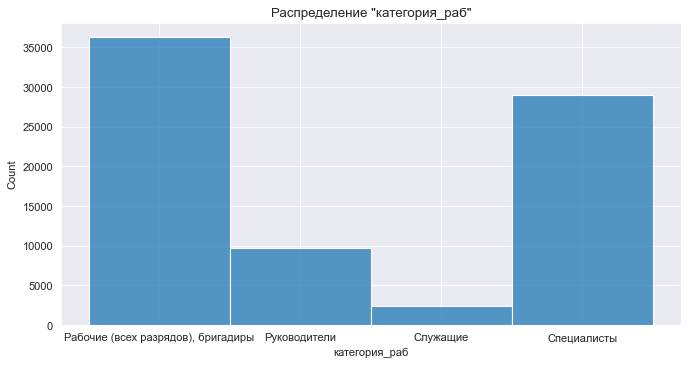

In [35]:
distribution(df_1['категория_раб'],'x')

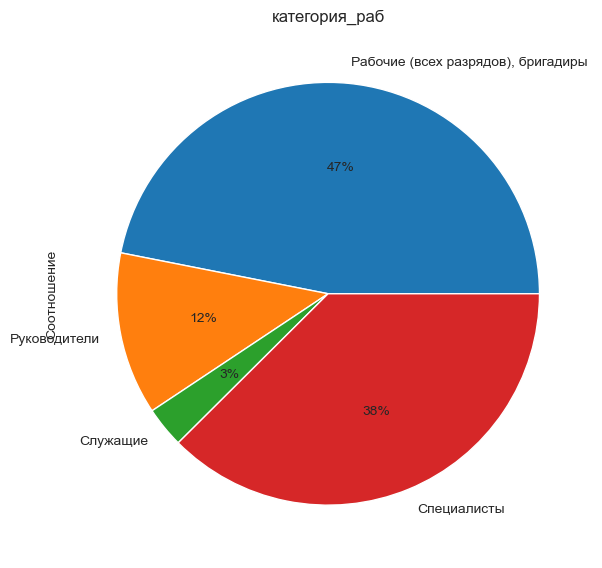

In [36]:
piechart(df_1, df_1['категория_раб'], df_1['ид'])

Основная масса заполнявших анкету пришлась на рабочих, бригадиров и специалистов

Мужской    45064
Женский    32301
Name: пол, dtype: int64

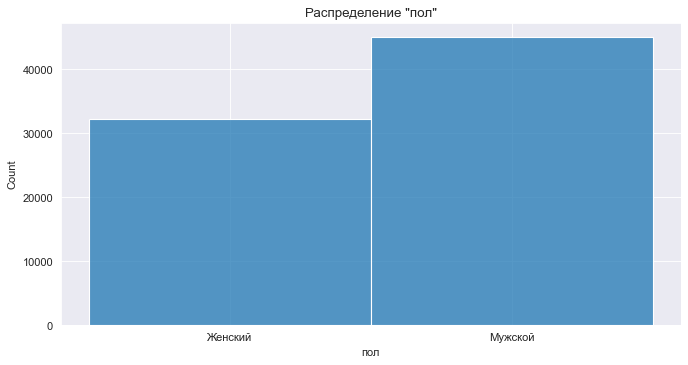

In [37]:
distribution(df_1['пол'], 'x')

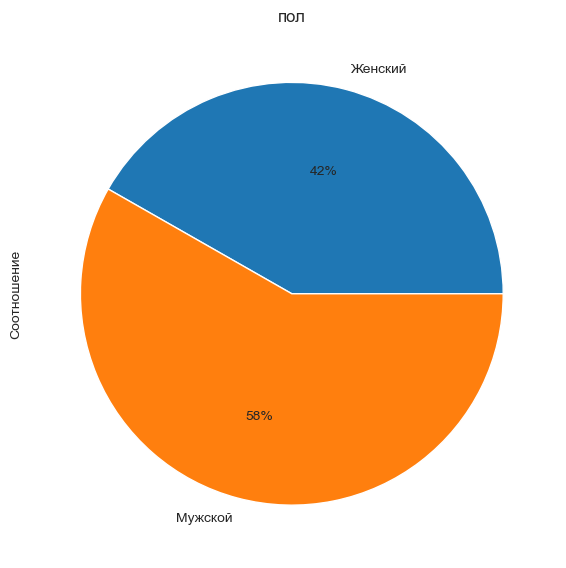

In [38]:
piechart(df_1, df_1['пол'], df_1['ид'])

Мужчин больше, чем женщин

36-40 лет        13911
31-35 лет        13404
51-60 лет        12376
41-45 лет        11976
46-50 лет        10681
26-30 лет         8464
22-25 лет         4153
старше 60 лет     1615
18-21 год          785
Name: возраст, dtype: int64

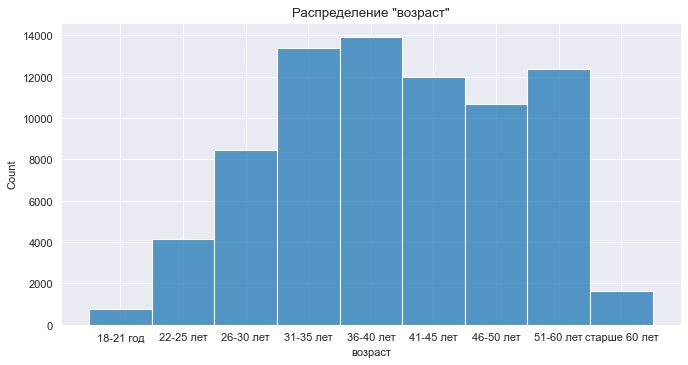

In [39]:
distribution(df_1['возраст'], 'x')

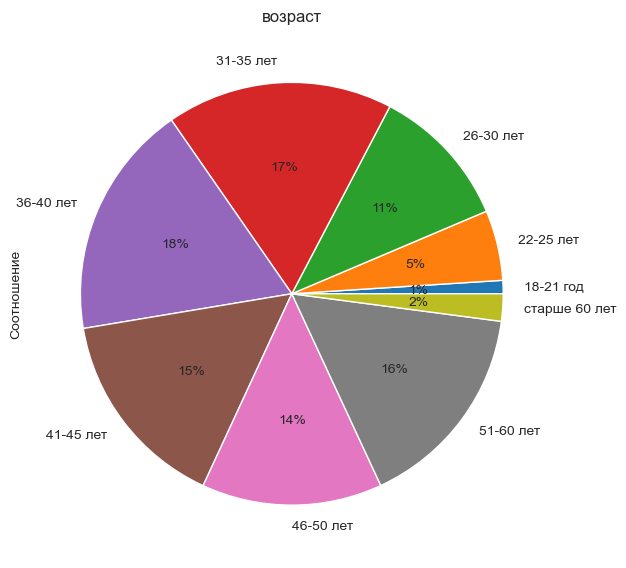

In [40]:
piechart(df_1, df_1['возраст'], df_1['ид'])

Самый распространенный возраст заполнения анкеты 36-40 лет, наименьшие группы представлены работниками в возрасте 18-21, а ткже старше 60 лет, что логично

Северная                  8733
Западно-Сибирская         8651
Октябрьская               7202
Северо-Кавказская         6149
Горьковская               4929
Куйбышевская              4646
Свердловская              4635
Московская                4516
Дальневосточная           4359
Красноярская              4288
Южно-Уральская            4147
Приволжская               3918
Юго-Восточная             3389
Забайкальская             3125
Восточно-Сибирская        2866
Центральное подчинение    1089
Калининградская            723
Name: полигон, dtype: int64

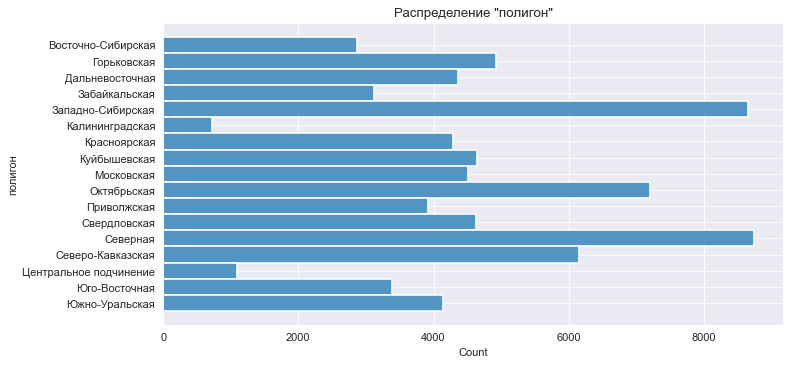

In [41]:
distribution(df_1['полигон'], 'y')

По количеству заполнивших анкету на полигоне работников выделяются Северный и Западно-Сибирский

Центральная дирекция инфраструктуры (ЦДИ)                              18317
Дирекция тяги (ЦТ)                                                     13729
Центральная дирекция управления движением (ЦД)                          9335
Подразделения РЦКУ железных дорог                                       6960
Центральная станция связи (ЦСС)                                         4311
Центральная дирекция по ремонту пути (ЦДРП)                             3463
Центральная дирекция по тепловодоснабжению (ЦДТВ)                       3323
Трансэнерго (ТЭ)                                                        2808
Центр фирменного транспортного обслуживания (ЦФТО)                      2147
Главный вычислительный центр (ГВЦ)                                      2129
Центр корпоративного учета и отчетности 'Желдоручет' (ЖДУ)              1870
Центральная дирекция моторвагонного подвижного состава (ЦДМВ)           1861
Дирекция железнодорожных вокзалов (ДЖВ)                                 1442

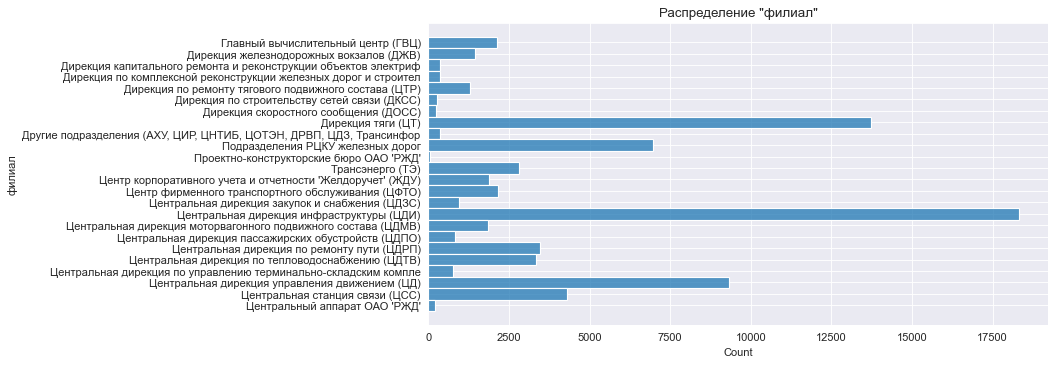

In [42]:
distribution(df_1['филиал'], 'y')

По количеству заполнивших анкету по филиалам ожидаемо выделяются ЦДИ и ЦТ

Высшее образование                        40452
Среднее профессиональное образование      22309
Начальное профессиональное образование     5885
Среднее (полное) общее образование         5476
Основное (общее) образование               1828
Неполное высшее образование                 647
Послевузовское образование                  547
Начальное (общее) образование               221
Name: образование, dtype: int64

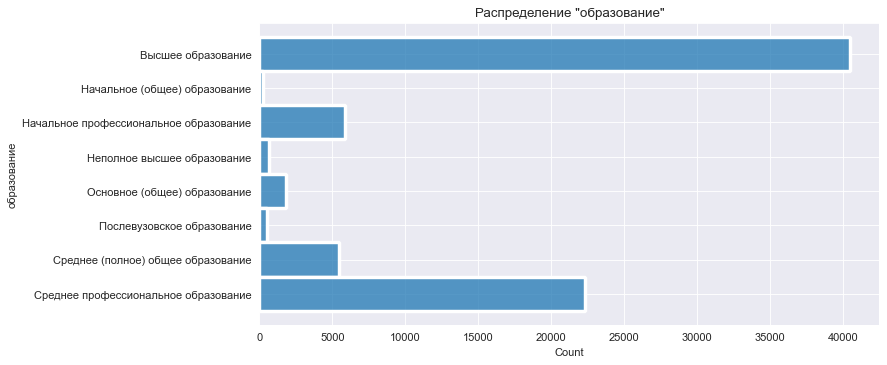

In [43]:
distribution(df_1['образование'], 'y')

Наибольшее количество анкетируемых имеют высшее образование

11    15526
8     12483
9     12474
6     12131
10     9961
7      6006
4      2724
5      2380
2      1315
3      1202
1      1163
Name: удовлетворенность, dtype: int64

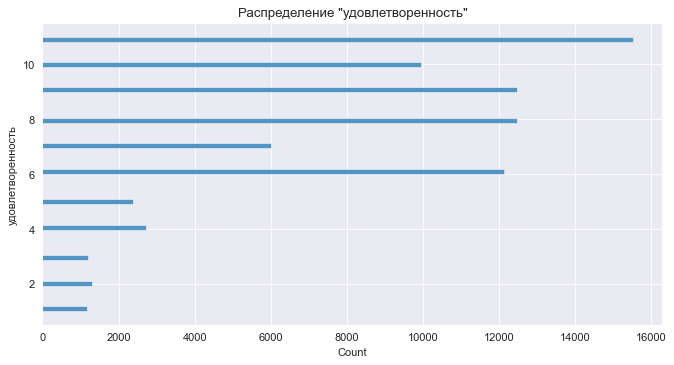

In [44]:
distribution(df_1['удовлетворенность'], 'y')

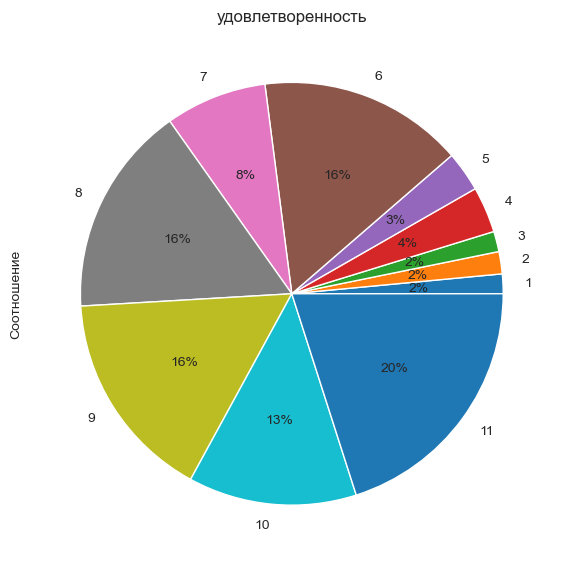

In [45]:
piechart(df_1, df_1['удовлетворенность'], df_1['ид'])

Чаще всего работники удовлетворены работой в ОАО "РЖД" на 100%, далее в равной степени проставлены удовлетворенность 80, 90 и 60%

11    17082
8     12253
10    11694
9     11472
6      7646
1      5962
7      3863
4      2631
5      1804
2      1633
3      1325
Name: г_рекомендовать, dtype: int64

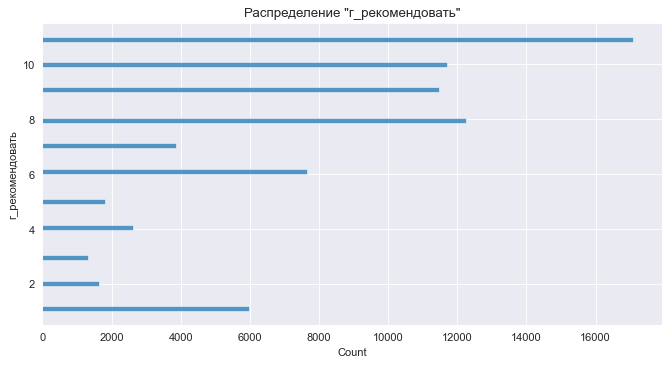

In [46]:
distribution(df_1['г_рекомендовать'], 'y')

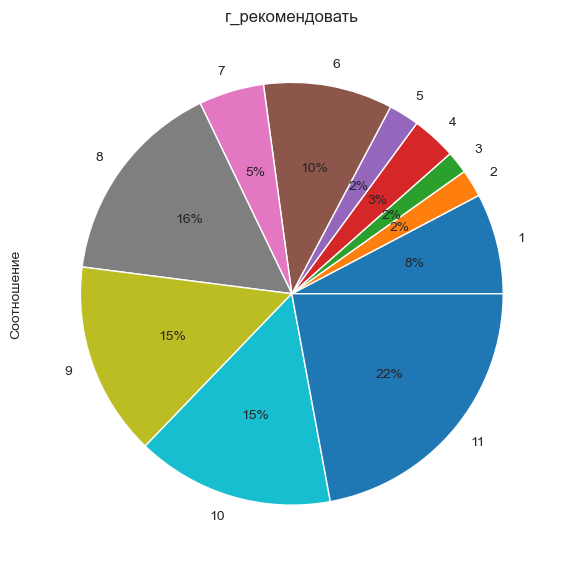

In [47]:
piechart(df_1, df_1['г_рекомендовать'], df_1['ид'])

Также сотрудники преимущественно готовы порекомендовать на 100% ОАО "РЖД" в качестве места работы

In [48]:
print('Процент работников, готовых рекомендовать ОАО "РЖД" на 70-100% составил: {:.2f}%'.format(
    ((df_1['г_рекомендовать'].value_counts()[11] + df_1['г_рекомендовать'].value_counts()[10] +
    df_1['г_рекомендовать'].value_counts()[9] + 
    df_1['г_рекомендовать'].value_counts()[8]) / df_1['г_рекомендовать'].count()) * 100))

Процент работников, готовых рекомендовать ОАО "РЖД" на 70-100% составил: 67.86%


Функция по построению сводной таблицы.  
На вход получает три столбца таблицы.  
Группирует данные сначала в разрезе столбца_1, затем столбца_2 и подсчитывает среднее значение по столбцу_3.  
Возвращает сформированную таблицу.

In [49]:
def pivot_table(column_1, column_2, column_3):
    table = df_1.pivot_table(
        index = [column_1.name, column_2.name],
        values = column_3.name,
        aggfunc = 'mean'
    )
    display(table)
    return table

In [50]:
age = pivot_table(df_1['пол'], df_1['возраст'], df_1['удовлетворенность'])

удовлетворенность
пол     возраст                         
Женский 18-21 год                   8.30
        22-25 лет                   8.02
        26-30 лет                   8.14
        31-35 лет                   8.28
        36-40 лет                   8.46
        41-45 лет                   8.48
        46-50 лет                   8.53
        51-60 лет                   8.76
        старше 60 лет               9.27
Мужской 18-21 год                   8.36
        22-25 лет                   7.78
        26-30 лет                   7.54
        31-35 лет                   7.55
        36-40 лет                   7.77
        41-45 лет                   7.87
        46-50 лет                   7.96
        51-60 лет                   8.34
        старше 60 лет               9.12

В среднем женщины больше удовлетворены работой, чем мужчины по всем возрастным категориям, кроме 18-21 год

In [51]:
age.sort_values(by='удовлетворенность', ascending=False)

удовлетворенность
пол     возраст                         
Женский старше 60 лет               9.27
Мужской старше 60 лет               9.12
Женский 51-60 лет                   8.76
        46-50 лет                   8.53
        41-45 лет                   8.48
        36-40 лет                   8.46
Мужской 18-21 год                   8.36
        51-60 лет                   8.34
Женский 18-21 год                   8.30
        31-35 лет                   8.28
        26-30 лет                   8.14
        22-25 лет                   8.02
Мужской 46-50 лет                   7.96
        41-45 лет                   7.87
        22-25 лет                   7.78
        36-40 лет                   7.77
        31-35 лет                   7.55
        26-30 лет                   7.54

Наиболее удовлетворены работой пожилые люди (старше 60 лет)

In [52]:
def satisfaction(table): 
    plt.figure(figsize=(20,5), dpi=100)
    sns.set_style('darkgrid')
    plt.title('Удовлетворенность в разрезе' + ' \"' +  table.columns[0] + '\"' + ' и ' + '\"' +table.columns[1] + '\"')

    sns.barplot(x=table[table.columns[1]], y=table[table.columns[2]], hue=table[table.columns[0]])

    plt.show()

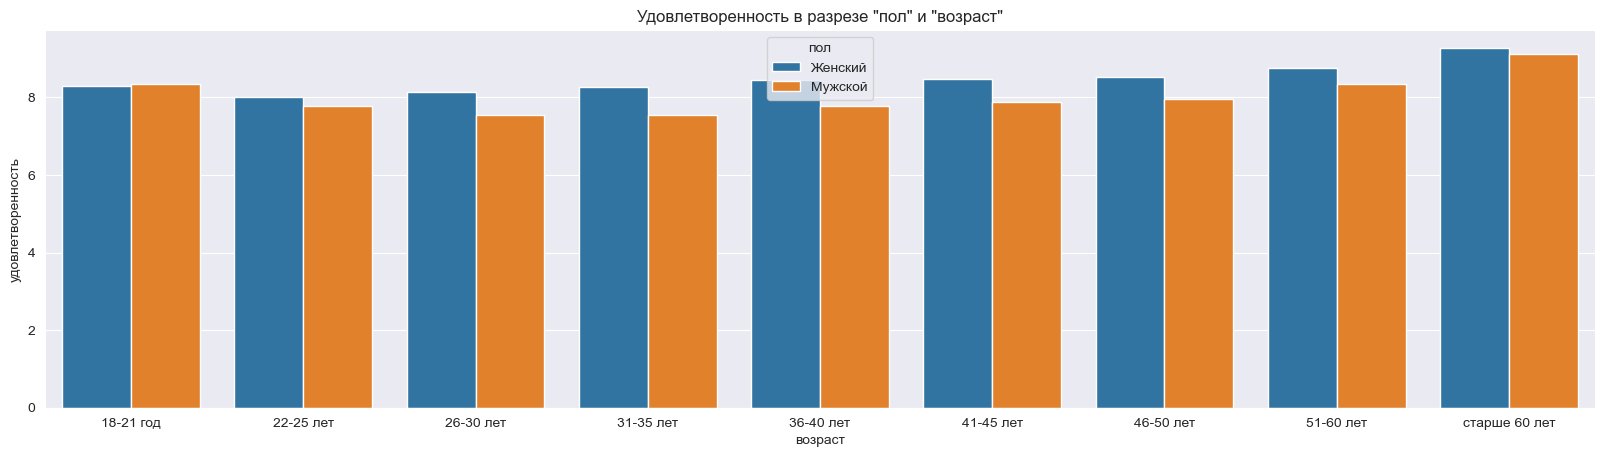

In [53]:
age_reset = age.reset_index()
satisfaction(age_reset)

Во всех возрастных категориях, кроме 18-21, женщины больше, чем мужчины удовлетворены работой в компании

In [54]:
category = pivot_table(df_1['пол'], df_1['категория_раб'], df_1['удовлетворенность'])
category.sort_values(by='удовлетворенность', ascending=False)

удовлетворенность
пол     категория_раб                                        
Женский Рабочие (всех разрядов), бригадиры               8.27
        Руководители                                     8.95
        Служащие                                         8.28
        Специалисты                                      8.47
Мужской Рабочие (всех разрядов), бригадиры               7.64
        Руководители                                     8.57
        Служащие                                         8.09
        Специалисты                                      8.07

удовлетворенность
пол     категория_раб                                        
Женский Руководители                                     8.95
Мужской Руководители                                     8.57
Женский Специалисты                                      8.47
        Служащие                                         8.28
        Рабочие (всех разрядов), бригадиры               8.27
Мужской Служащие                                         8.09
        Специалисты                                      8.07
        Рабочие (всех разрядов), бригадиры               7.64

Больше всего удовлетворены работой руководители (в большей мере женщины).  

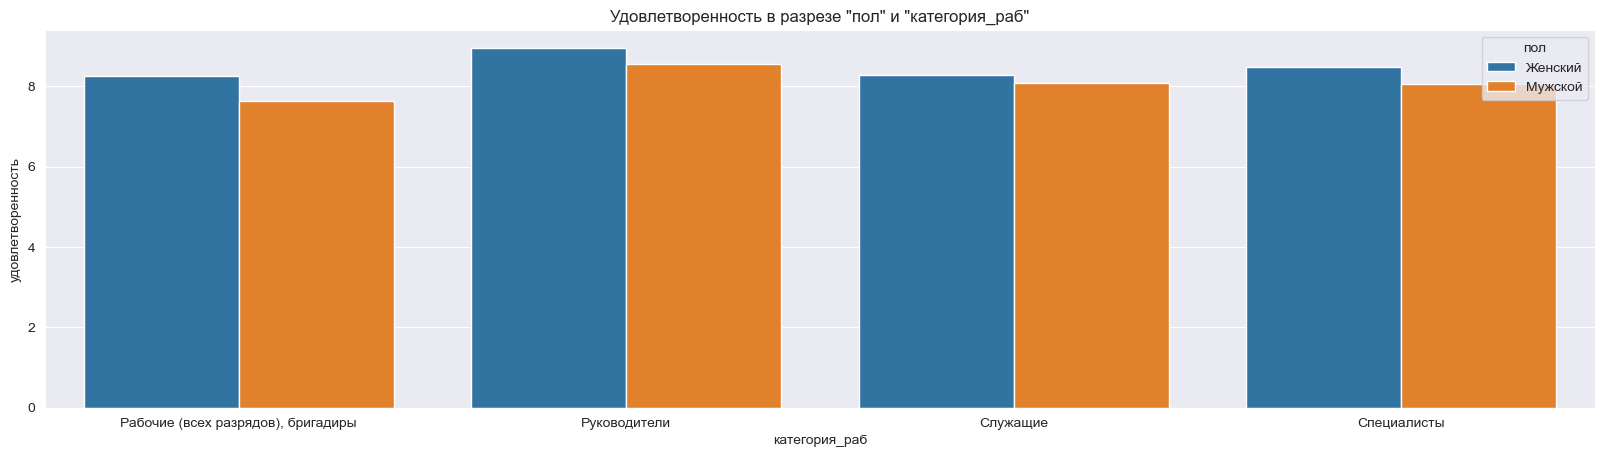

In [55]:
category_reset = category.reset_index()
satisfaction(category_reset)

В каждой категории работников удовлетворенность работой в компании выше у женщин

In [56]:
region = pivot_table(df_1['категория_раб'], df_1['полигон'], df_1['удовлетворенность'])

удовлетворенность
категория_раб                      полигон                                  
Рабочие (всех разрядов), бригадиры Восточно-Сибирская                   7.91
                                   Горьковская                          7.05
                                   Дальневосточная                      7.87
                                   Забайкальская                        7.63
                                   Западно-Сибирская                    7.87
...                                                                      ...
Специалисты                        Северная                             8.52
                                   Северо-Кавказская                    8.53
                                   Центральное подчинение               8.83
                                   Юго-Восточная                        8.25
                                   Южно-Уральская                       8.20

[67 rows x 1 columns]

Срез топ-15

In [57]:
region.sort_values(by='удовлетворенность', ascending=False).head(15)

удовлетворенность
категория_раб                      полигон                                  
Руководители                       Приволжская                          9.14
                                   Центральное подчинение               9.14
                                   Калининградская                      9.03
                                   Восточно-Сибирская                   8.96
                                   Московская                           8.96
                                   Северная                             8.91
Рабочие (всех разрядов), бригадиры Центральное подчинение               8.86
Специалисты                        Центральное подчинение               8.83
Руководители                       Северо-Кавказская                    8.81
                                   Юго-Восточная                        8.81
                                   Свердловская                         8.81
Служащие                           Юго-Восточная                        8.81
Специалисты                        Приволжская                          8.80
Руководители                       Забайкальская                        8.75
                                   Южно-Уральская                       8.71

Срез последние 15

In [58]:
region.sort_values(by='удовлетворенность', ascending=False).tail(15)

удовлетворенность
категория_раб                      полигон                              
Специалисты                        Горьковская                      7.94
Рабочие (всех разрядов), бригадиры Приволжская                      7.91
                                   Восточно-Сибирская               7.91
                                   Западно-Сибирская                7.87
                                   Дальневосточная                  7.87
                                   Октябрьская                      7.82
                                   Красноярская                     7.82
                                   Северная                         7.69
                                   Московская                       7.65
                                   Забайкальская                    7.63
                                   Свердловская                     7.61
Служащие                           Октябрьская                      7.55
Рабочие (всех разрядов), бригадиры Южно-Уральская                   7.47
                                   Куйбышевская                     7.30
                                   Горьковская                      7.05

Преимущественно на полигонах наиболее удовлетворены работой руководители, наименее - рабочие

In [59]:
region_reset = region.reset_index()

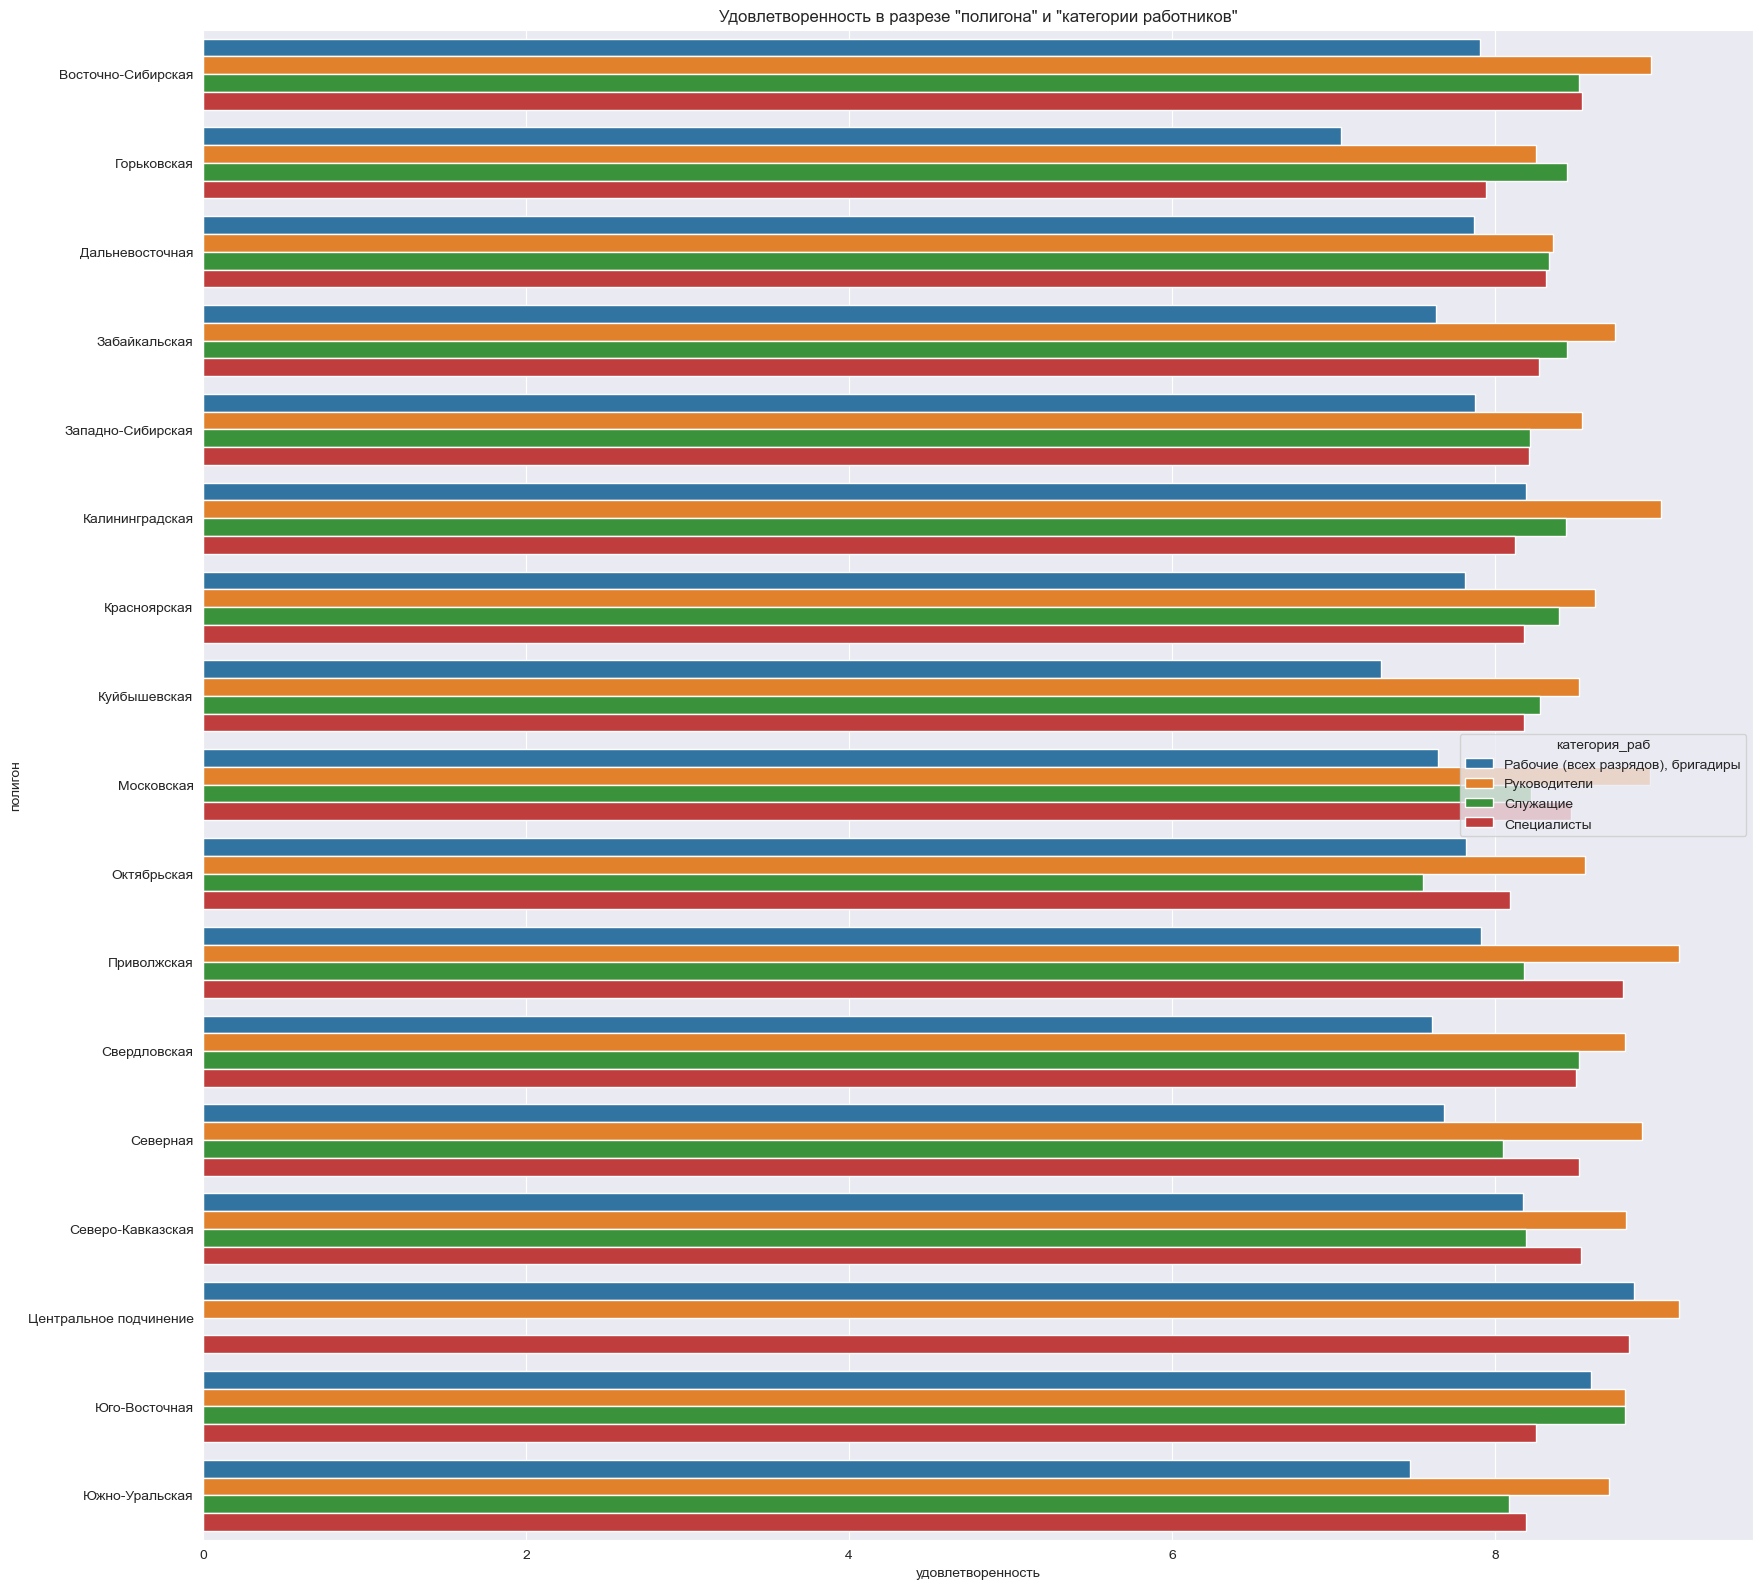

In [60]:
plt.figure(figsize=(20,20), dpi=100)
sns.set_style('darkgrid')
plt.title('Удовлетворенность в разрезе "полигона" и "категории работников"')
sns.barplot(x=region_reset['удовлетворенность'], y=region_reset['полигон'], hue=region_reset['категория_раб'])

plt.show()

Практически на всех полигонах руководители удовлетворены работой в большей мере, чем остальные категории работников

In [61]:
df_1.head(2)

,ид,полигон,филиал,категория_раб,пол,возраст,стаж_жд,образование,удовлетворенность,желание_работать,г_рекомендовать,хор_отзыв,рекомендую,заставить_уйти,думаю_уйти,делать_лучше,достигать,раб_место,ресурсы,режим_труда,зарплата,рез_работы,соцпакет,соцгарантии,обучение,карьерный_рост,руководитель,коллектив,культмас,заслуги,информирование,целевое_значение
0,1,Северная,Дирекция тяги (ЦТ),Служащие,Женский,51-60 лет,11-20 лет,Высшее образование,9,Более 10 лет,9,Скорее согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,78.77
1,2,Северная,Дирекция тяги (ЦТ),"Рабочие (всех разрядов), бригадиры",Женский,31-35 лет,4-5 лет,Высшее образование,11,1-2 года,10,Согласен,Скорее согласен,Скорее согласен,Скорее согласен,Согласен,Скорее согласен,Удовлетворен,Удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее удовлетворен,НЕ удовлетворен,Скорее НЕ удовлетворен,Удовлетворен,Скорее удовлетворен,Скорее удовлетворен,Скорее НЕ удовлетворен,Скорее удовлетворен,75.00


Проверим взаимосвязь значений удовлетворенности и готовности рекомендовать с целевым занчением

In [62]:
df_1[['удовлетворенность', 'г_рекомендовать', 'целевое_значение']].corr()

,удовлетворенность,г_рекомендовать,целевое_значение
удовлетворенность,1.00,0.71,0.65
г_рекомендовать,0.71,1.00,0.60
целевое_значение,0.65,0.60,1.00


<Figure size 1500x1500 with 0 Axes>

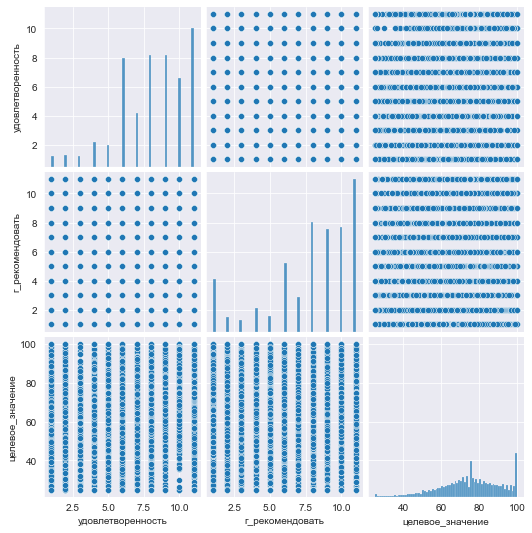

In [63]:
plt.figure(figsize=(15,15), dpi=100)
sns.pairplot(df_1[['удовлетворенность', 'г_рекомендовать', 'целевое_значение']])

plt.show()

Значительной взаимосвязи нет

## Целевое значение

Функция принимает столбец по которому строит график распределения и график выбросов боксплот, а также выводит следующие данные столбца:  
- количество
- среднее
- стандартное отклонение
- минимальное значение
- 1-ый квартиль (25%)
- медиану
- 3-ий квартиль (75%)
- максимальное значение

In [64]:
def distr(series):
    plt.figure(figsize=(13,7), dpi=100)
    sns.set_style('darkgrid')
  
    plt.subplot(211)
    plt.title('Распределение ' + series.name)
    sns.distplot(series)
    
    plt.subplot(212)
    sns.boxenplot(series)

    plt.show()
    display(series.describe())

Посмотрим как распределены данные в целевом столбце

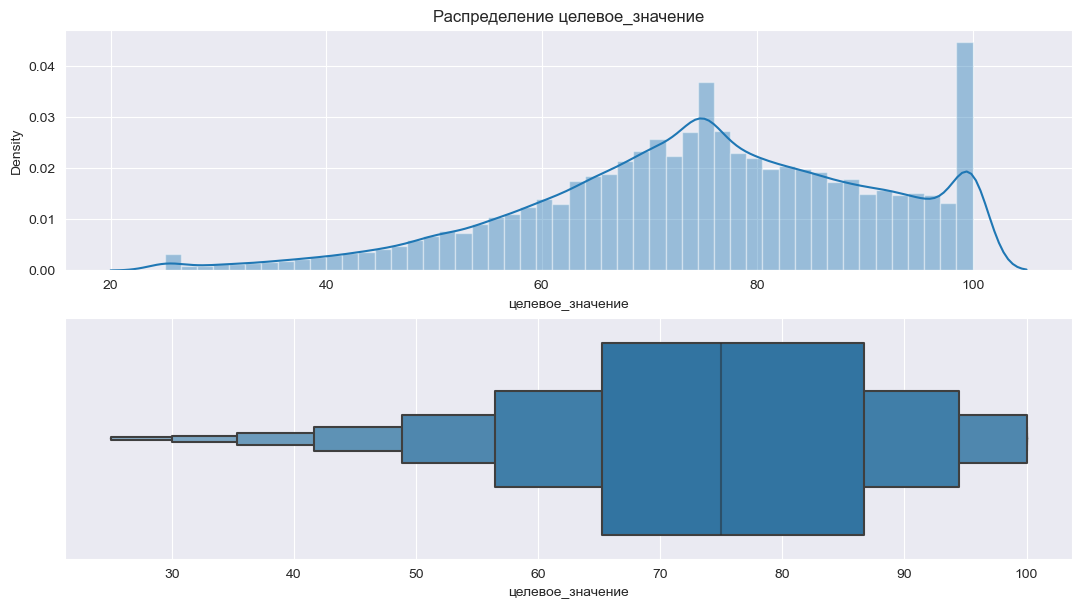

count   77,365.00
mean        74.88
std         15.85
min         25.00
25%         65.22
50%         75.00
75%         86.67
max        100.00
Name: целевое_значение, dtype: float64

In [65]:
distr(df_1['целевое_значение'])

В целом данные распределены нормальным образом, за исключением пика с значением __100__

Посмотрим на данные с значением 100

In [66]:
df_1[df_1['целевое_значение'] == 100].head(3)

,ид,полигон,филиал,категория_раб,пол,возраст,стаж_жд,образование,удовлетворенность,желание_работать,г_рекомендовать,хор_отзыв,рекомендую,заставить_уйти,думаю_уйти,делать_лучше,достигать,раб_место,ресурсы,режим_труда,зарплата,рез_работы,соцпакет,соцгарантии,обучение,карьерный_рост,руководитель,коллектив,культмас,заслуги,информирование,целевое_значение
18,32,Западно-Сибирская,Центральная дирекция инфраструктуры (ЦДИ),"Рабочие (всех разрядов), бригадиры",Мужской,31-35 лет,1-3 года,Начальное профессиональное образование,9,Более 10 лет,10,Согласен,Согласен,Согласен,Согласен,Согласен,Согласен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,100.00
23,39,Северная,Центральная дирекция управления движением (ЦД),Специалисты,Женский,31-35 лет,11-20 лет,Среднее профессиональное образование,11,Всю жизнь (до пенсии),11,Полностью согласен,Полностью согласен,Полностью согласен,Согласен,Полностью согласен,Полностью согласен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,100.00
40,61,Свердловская,Трансэнерго (ТЭ),Специалисты,Мужской,46-50 лет,11-20 лет,Высшее образование,9,Всю жизнь (до пенсии),9,Скорее согласен,Скорее согласен,Скорее НЕ согласен,НЕ согласен,Скорее согласен,Скорее НЕ согласен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,Удовлетворен,100.00


Работники с целевым значением равным 100 высоко удовлетворены работой в комании и готовы рекомендовать компанию, также они зачастую удовлетворены по всем параметрам (столбцам нашей таблицы)

In [67]:
degree_100 = df_1[df_1['целевое_значение'] == 100]
print(
    'Количество записей в таблице с максимальной оценкой целевого значения: {}'.format(
        degree_100['целевое_значение'].count())
)
print(
    'Процент от общего количества: {:.0%}'.format(
        degree_100['целевое_значение'].count() / df_1['целевое_значение'].count())   
)

Количество записей в таблице с максимальной оценкой целевого значения: 4813
Процент от общего количества: 6%


In [68]:
higher_mean = df_1[df_1['целевое_значение'] > df_1['целевое_значение'].mean()]
print(
    'Количество записей в таблице с оценкой выше среднего целевого значения: {}'.format(
        higher_mean['целевое_значение'].count()))
print(
    'Процент от общего количества: {:.0%}'.format(
        higher_mean['целевое_значение'].count() / df_1['целевое_значение'].count())
)

Количество записей в таблице с оценкой выше среднего целевого значения: 41260
Процент от общего количества: 53%


## Кодирование нечисловых признаков

In [69]:
data_ordinal = df_1.copy(deep=True)

In [70]:
categorical = ['полигон', 'филиал', 'категория_раб', 'пол', 'возраст', 'стаж_жд', 'образование',\
    'желание_работать', 'хор_отзыв', 'рекомендую', 'заставить_уйти', 'думаю_уйти', 'делать_лучше', \
     'достигать', 'раб_место', 'ресурсы', 'режим_труда', 'зарплата', 'рез_работы', 'соцпакет', 'соцгарантии', \
     'обучение', 'карьерный_рост', 'руководитель', 'коллектив', 'культмас', 'заслуги', 'информирование'
    ]

In [71]:
encoder = OrdinalEncoder()
encoder.fit(data_ordinal[categorical])
data_ordinal[categorical] = encoder.transform(data_ordinal[categorical])
data_ordinal.head(5)

,ид,полигон,филиал,категория_раб,пол,возраст,стаж_жд,образование,удовлетворенность,желание_работать,г_рекомендовать,хор_отзыв,рекомендую,заставить_уйти,думаю_уйти,делать_лучше,достигать,раб_место,ресурсы,режим_труда,зарплата,рез_работы,соцпакет,соцгарантии,обучение,карьерный_рост,руководитель,коллектив,культмас,заслуги,информирование,целевое_значение
0,1,12.00,7.00,2.00,0.00,7.00,1.00,0.00,9,4.00,9,3.00,3.00,3.00,3.00,5.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,78.77
1,2,12.00,7.00,0.00,0.00,3.00,2.00,0.00,11,0.00,10,5.00,3.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,2.00,2.00,2.00,2.00,0.00,1.00,3.00,2.00,2.00,1.00,2.00,75.00
2,13,10.00,1.00,2.00,0.00,6.00,1.00,0.00,11,4.00,11,5.00,5.00,1.00,1.00,0.00,1.00,3.00,2.00,1.00,3.00,1.00,3.00,3.00,3.00,1.00,2.00,1.00,3.00,3.00,3.00,79.27
3,15,8.00,16.00,0.00,1.00,3.00,1.00,7.00,9,4.00,10,5.00,5.00,1.00,5.00,5.00,5.00,3.00,3.00,3.00,2.00,2.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,3.00,3.00,94.55
4,16,12.00,21.00,0.00,1.00,5.00,1.00,2.00,6,5.00,9,2.00,2.00,2.00,2.00,2.00,5.00,1.00,2.00,1.00,1.00,1.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,79.41


Категориальные нечисловые значения преобразовали в числовые, так как модели машинного обучения могут работать только с числовыми значениями

## Корреляция

Проверим, как коррелируют признаки и целевое значение

In [72]:
data_ordinal.corr()

,ид,полигон,филиал,категория_раб,пол,возраст,стаж_жд,образование,удовлетворенность,желание_работать,г_рекомендовать,хор_отзыв,рекомендую,заставить_уйти,думаю_уйти,делать_лучше,достигать,раб_место,ресурсы,режим_труда,зарплата,рез_работы,соцпакет,соцгарантии,обучение,карьерный_рост,руководитель,коллектив,культмас,заслуги,информирование,целевое_значение
ид,1.00,-0.05,-0.03,0.25,-0.11,0.04,-0.05,-0.16,0.06,-0.01,0.06,0.03,0.02,0.02,-0.00,0.01,0.02,0.07,0.05,0.06,0.04,0.04,0.04,0.06,0.00,0.00,0.04,0.03,0.03,0.02,0.04,0.06
полигон,-0.05,1.00,0.01,0.02,-0.02,0.03,-0.00,-0.02,0.04,0.01,0.04,-0.00,-0.01,-0.01,0.02,-0.01,-0.00,0.01,0.03,0.03,0.02,0.02,0.02,0.02,0.03,0.03,0.03,0.02,0.02,0.03,0.03,0.04
филиал,-0.03,0.01,1.00,0.07,-0.13,0.02,-0.08,0.05,0.03,0.00,0.06,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.07,0.02,0.04,0.02,0.05,0.06,0.05,0.06,0.06,0.04,0.05,0.03,0.04,0.04,0.06
категория_раб,0.25,0.02,0.07,1.00,-0.44,0.04,-0.12,-0.41,0.10,-0.00,0.12,0.06,0.05,0.04,-0.04,0.03,0.04,0.16,0.11,0.13,0.09,0.09,0.07,0.14,-0.02,-0.03,0.09,0.05,0.07,0.01,0.07,0.11
пол,-0.11,-0.02,-0.13,-0.44,1.00,-0.10,0.09,0.23,-0.13,-0.01,-0.18,-0.07,-0.06,-0.04,-0.01,-0.04,-0.05,-0.14,-0.14,-0.17,-0.11,-0.10,-0.13,-0.16,-0.05,-0.02,-0.10,-0.02,-0.10,-0.03,-0.10,-0.15
возраст,0.04,0.03,0.02,0.04,-0.10,1.00,-0.13,-0.00,0.11,0.02,0.12,-0.00,0.00,0.01,0.07,0.02,0.01,0.10,0.07,0.11,0.01,0.01,0.05,0.08,0.06,0.10,0.02,0.00,0.06,0.04,0.08,0.08
стаж_жд,-0.05,-0.00,-0.08,-0.12,0.09,-0.13,1.00,0.09,-0.04,-0.02,-0.06,-0.01,-0.02,-0.00,-0.01,-0.00,-0.01,-0.07,-0.03,-0.04,-0.03,-0.03,-0.03,-0.05,-0.02,-0.01,-0.02,-0.02,-0.02,-0.01,-0.03,-0.04
образование,-0.16,-0.02,0.05,-0.41,0.23,-0.00,0.09,1.00,-0.08,0.00,-0.09,-0.03,-0.03,-0.02,0.02,0.00,-0.01,-0.11,-0.10,-0.08,-0.08,-0.06,-0.06,-0.12,0.03,0.06,-0.06,-0.02,-0.05,-0.01,-0.04,-0.08
удовлетворенность,0.06,0.04,0.03,0.10,-0.13,0.11,-0.04,-0.08,1.00,0.06,0.71,0.14,0.14,0.07,0.21,0.11,0.14,0.43,0.47,0.50,0.52,0.52,0.43,0.38,0.39,0.43,0.47,0.34,0.39,0.44,0.44,0.65
желание_работать,-0.01,0.01,0.00,-0.00,-0.01,0.02,-0.02,0.00,0.06,1.00,0.07,0.01,0.02,0.01,0.02,0.01,0.01,0.03,0.02,0.04,0.01,0.02,0.02,0.03,0.03,0.03,0.03,0.02,0.03,0.02,0.03,0.04


Построим тепловую карту для наглядности корреляции

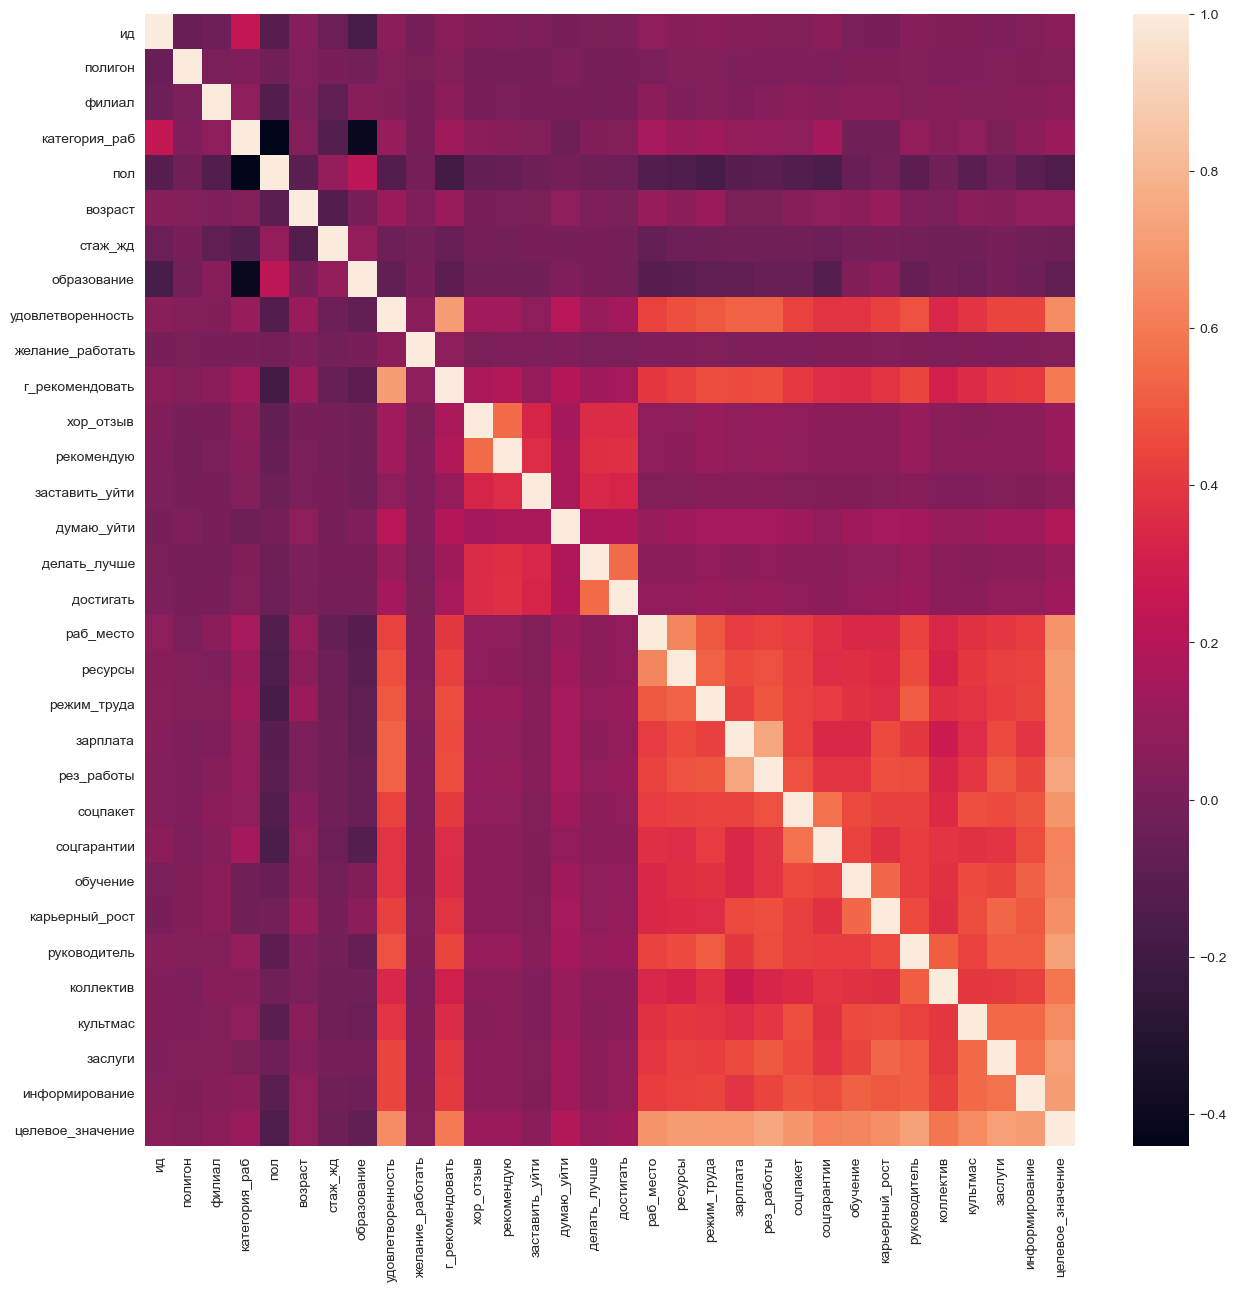

In [73]:
plt.figure(figsize=(15,15), dpi=100)
sns.set_style('darkgrid')
sns.heatmap(data_ordinal.corr())

plt.show()

Самые высокие (светлые на тепловой карте) значения корреляции (взаимосвязи) с целевым значением у признаков: __отношение непосредственного руководителя__ и __зависимость оплаты труда от результатов работы__.  
Однако, корреляция этих признаков = 0.75, что нельзя назвать сильно взаимосвязанными, поэтому оба признака оставим в массиве данных, тем более между собой у них низкая взаимосвязь.

Удаляем идентификационный номер опрошенного, так как данный признак не несет изменчивой информации и не может влиять на работу модели

In [74]:
data_ordinal = data_ordinal.drop(['ид'], axis=1)

# Обучение моделей

## Формирование выборок

Выделяем признаки в выборку _features_ и целевое значение в выборку _target_

In [75]:
features = data_ordinal.drop(['целевое_значение'], axis = 1)
target = data_ordinal['целевое_значение']

Делим выборки в соотношении 60%-20%-20% (обучающая-валидационная-тестовая)

In [76]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345
)

In [77]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345
)

Проверяем размер выборок

In [78]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(46419, 30)
(15473, 30)
(15473, 30)


In [79]:
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

(46419,)
(15473,)
(15473,)


## Метрика качества

Так как сильных вбросов в данных нет будем использовать метрику __[MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (Mean Squared Error - средняя квадратическая ошибка).__  
__MSE__ в основном измеряет среднеквадратичную ошибку наших прогнозов. Для каждой точки вычисляется квадратная разница между прогнозами и целью, а затем усредняются эти значения.  
Чем выше это значение, тем хуже модель. Метрика никогда не бывает отрицательной, поскольку мы возводим в квадрат отдельные ошибки прогнозирования, прежде чем их суммировать.  

Но выводить для наглядности будем значение __[RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation#:~:text=Среднеквадратичное%20отклонение%20(RMSD)%20или%20среднеквадратичная,или%20среднее%20квадратичное%20этих%20разностей) (Root Mean Squared Error)__ - это просто квадратный корень из MSE. Квадратный корень введен, чтобы масштаб ошибок был таким же, как масштаб целей. То есть будем видеть на сколько единиц целевого значения мы ошибаемся.  

Формулы метрик и более подробную информацию можете увидеть по ссылкам.

## RandomForestRegressor

In [80]:
model_rf = RandomForestRegressor(n_estimators=10, random_state=12345)
model_rf.fit(features_train, target_train)
predicted_valid = model_rf.predict(features_valid)
rmse_rf = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель RandomForestRegressor: RMSE = {:.2f}'.format(rmse_rf))

Модель RandomForestRegressor: RMSE = 2.75


Подберем гиперпараметры с целью лучшего прогноза модели

In [81]:
def hyperopt_score_rf(params):
    model = RandomForestRegressor(**params)
    current_score = cross_val_score(
        model,
        features_train,
        target_train,
        scoring = 'neg_mean_squared_error',
        cv = 3
    ).mean()
    print(current_score, params)
    return current_score

In [82]:
simple_space_rf = {
    'n_estimators' : hp.choice('n_estimators', range(100, 500)),
    'max_depth' : hp.choice('max_depth', range(1, 14)),

#     'min_samples_leaf' : hp.choice('min_samples_leaf', range(1,6)),
#     'min_samples_split' : hp.choice ('min_samples_split', range(2, 10,2))
}

In [83]:
trials_rf = Trials()
best_rf = fmin(
    fn = hyperopt_score_rf,
    space = simple_space_rf,
    algo = tpe.suggest,
    max_evals = 10,
    trials=trials_rf,
    show_progressbar=True,
)

-9.647511917811768                                    
{'max_depth': 10, 'n_estimators': 170}                
-9.6804558695155                                                                
{'max_depth': 10, 'n_estimators': 149}                                          
-41.02010800386795                                                              
{'max_depth': 4, 'n_estimators': 175}                                         
-59.507687611419875                                                             
{'max_depth': 3, 'n_estimators': 341}                                           
-30.79624960231421                                                               
{'max_depth': 5, 'n_estimators': 395}                                            
-11.33440805888072                                                               
{'max_depth': 9, 'n_estimators': 282}                                            
-41.54291748804488                                                            

In [84]:
model_rf = RandomForestRegressor(n_estimators=398, random_state=12345, max_depth=13)

start = time.time()
model_rf.fit(features_train, target_train)
end = time.time()
time_fit_rf = end-start # in seconds

predicted_valid = model_rf.predict(features_valid)
rmse_rf = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель RandomForestRegressor: RMSE = {:.2f}'.format(rmse_rf))
print('Время обучения модели = {:.2f} сек.'.format(time_fit_rf))

Модель RandomForestRegressor: RMSE = 2.62
Время обучения модели = 56.52 сек.


Значение метрики улучшилось незначительно

__Функция__, которая выводит топ-5 важнейших признаков для предсказания модели, а также строит график важности всех признаков для модели

In [85]:
def importance(model, features_train, model_name):
    importances = model.feature_importances_
    feature_list = list(features_train.columns)
    feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

    feature_results = feature_results.sort_values('importance', ascending=False).reset_index(drop=True)
    display(feature_results.head())

    plt.figure(figsize=(15,20), dpi=100)
    sns.set_style('darkgrid')
    sns.barplot(y='feature', x='importance', data=feature_results)
    plt.title('Важность признаков модели '+ model_name)

    plt.show()

,feature,importance
0,рез_работы,0.41
1,информирование,0.17
2,руководитель,0.12
3,ресурсы,0.07
4,соцгарантии,0.04


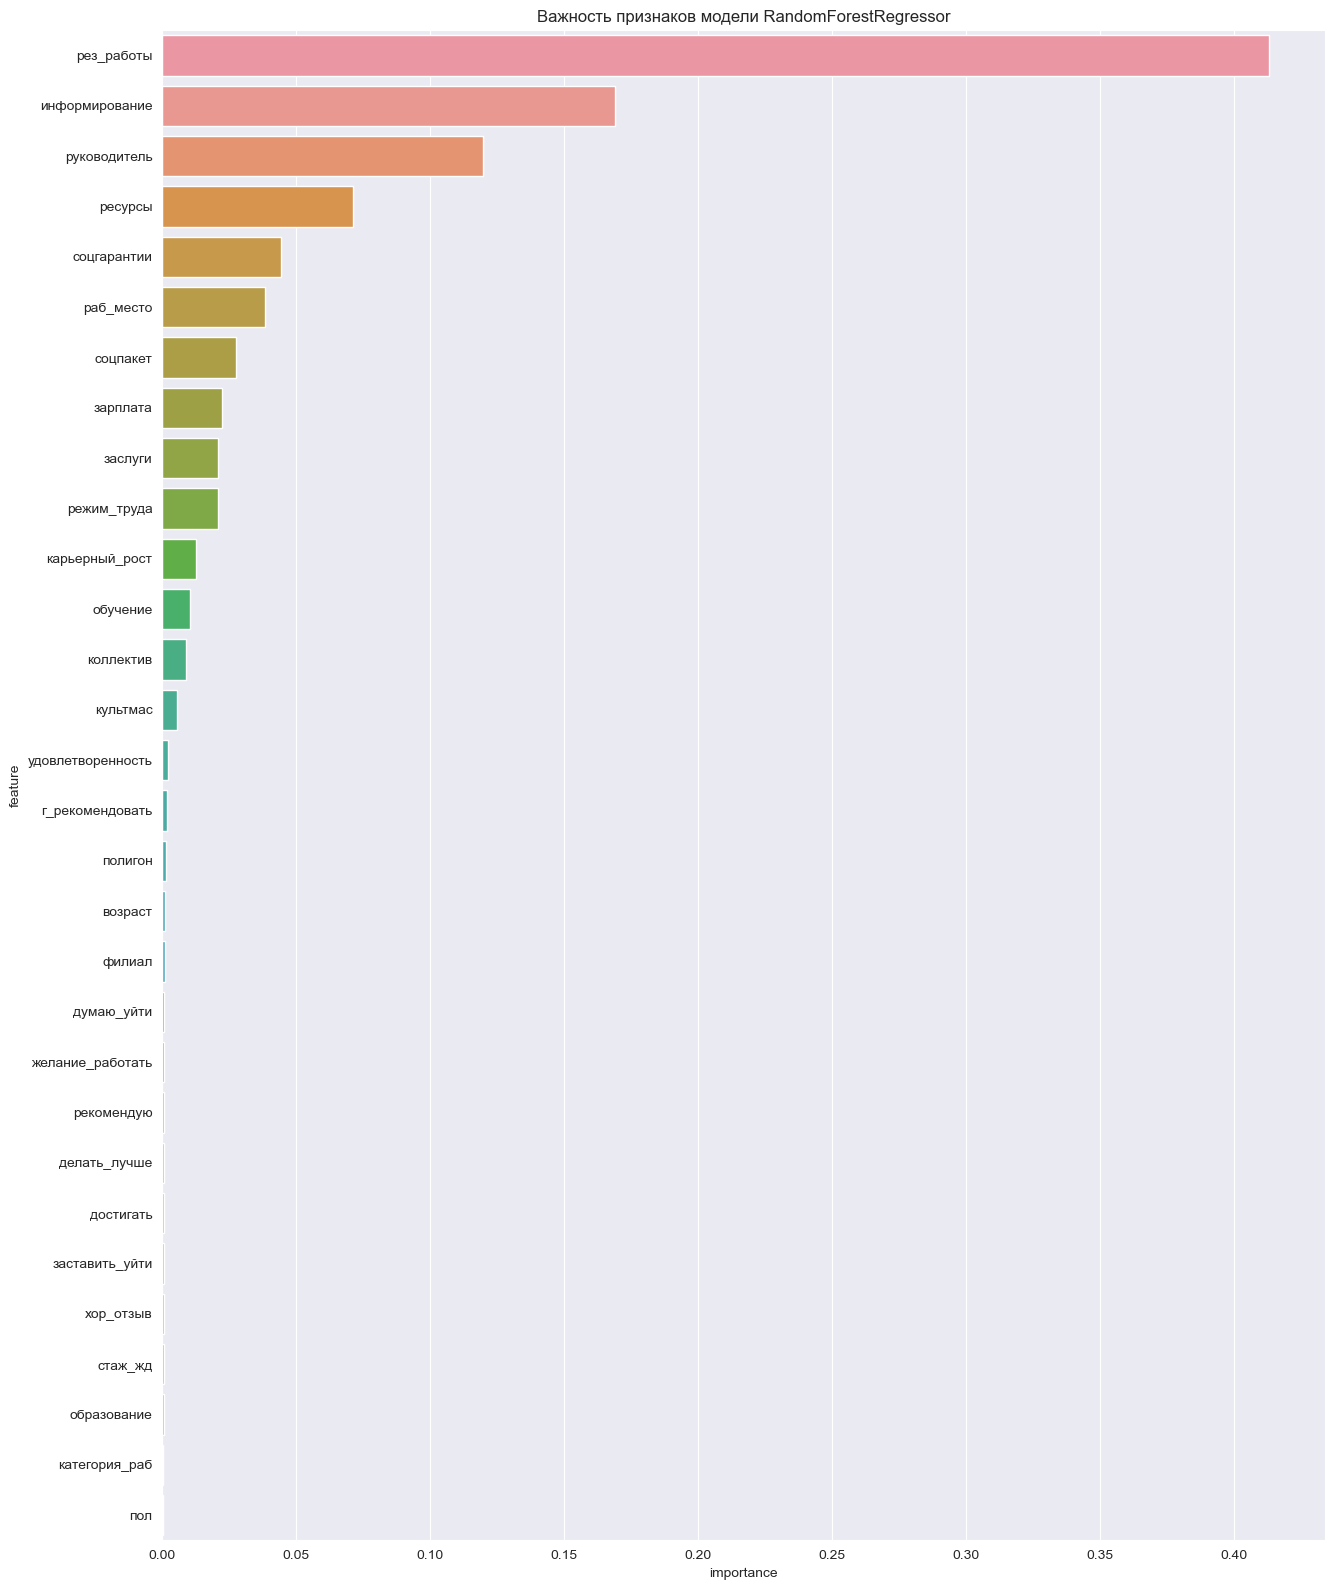

In [86]:
importance(model_rf, features_train, 'RandomForestRegressor')

Наиболее значимый признак для модели __зависимость оплаты труда от результатов работы__

## LGBMRegressor (Light Gradient Boosted Machine)

LightGBM — это фреймворк, который предоставляет реализацию деревьев принятия решений с градиентным бустингом. Он создан группой исследователей и разработчиков Microsoft

Переименуем название столбцов на транслит, так как модель LGBMRegressor работает только с латинскими названиями столбцов

In [87]:
features_train_lgbm = features_train.set_axis(
    ['poligon', 'filial', 'categoria_rab', 'pol', 'vozrast', 'stazh_zd', 'obrazovanie', 'udovletvorennost',\
    'zhelanie_rabotat', 'g_recommendovat', 'hor_otzyv', 'recommend', 'zastavit_uti', 'dumau_uti', 'delat_luchshe', \
     'dostigat', 'rab_mesto', 'resursy', 'rezhim_truda', 'zarplata', 'rez_raboty', 'socpacet', 'socgarantii', \
     'obuchenie', 'career_rost', 'rukovoditel', 'collectiv', 'kultmas', 'zaslugi', 'informirovanie'
    ], 
    axis='columns'
)

In [88]:
model_lgbm = LGBMRegressor(metric="rmse", n_estimators=10)
model_lgbm.fit(features_train_lgbm, target_train)
predicted_valid = model_lgbm.predict(features_valid)
rmse_lgbm = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель LGBMRegressor: RMSE = {:.2f}'.format(rmse_lgbm))

Модель LGBMRegressor: RMSE = 6.98


Подберем гиперпараметры с целью лучшего прогноза модели

In [89]:
def hyperopt_score_lgbm(params):
    model = LGBMRegressor(**params)
    current_score = cross_val_score(
        model,
        features_train_lgbm,
        target_train,
        scoring = 'neg_mean_squared_error',
        cv = 3
    ).mean()
    print(current_score, params)
    return current_score

In [90]:
simple_space_lgbm = {
    'n_estimators' : hp.choice('n_estimators', range(50, 500)),
    'max_depth' : hp.choice('max_depth', range(1, 15)),
}

In [91]:
trials_lgbm = Trials()
best_lgbm = fmin(
    fn = hyperopt_score_lgbm,
    space = simple_space_rf,
    algo = tpe.suggest,
    max_evals = 10,
    trials=trials_lgbm,
    show_progressbar=True,
)

-3.4862434550953965                                   
{'max_depth': 5, 'n_estimators': 274}                 
-3.64453422921161                                                                
{'max_depth': 7, 'n_estimators': 124}                                            
-3.3969096432615076                                                              
{'max_depth': 4, 'n_estimators': 360}                                          
-3.5893369356002864                                                            
{'max_depth': 10, 'n_estimators': 176}                                         
-3.5381997835948416                                                            
{'max_depth': 12, 'n_estimators': 389}                                         
-3.538445733303007                                                             
{'max_depth': 12, 'n_estimators': 495}                                         
-3.527688337626493                                                             
{'ma

In [92]:
model_lgbm = LGBMRegressor(metric="rmse", n_estimators=354, max_depth=3, random_state=12345)

model_lgbm.fit(features_train_lgbm, target_train)
predicted_valid = model_lgbm.predict(features_valid)
rmse_lgbm = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель LGBMRegressor: RMSE = {:.2f}'.format(rmse_lgbm))

Модель LGBMRegressor: RMSE = 1.81


Метрика значительно улучшилась

Попробуем также подобрать гиперпараметры с помощью GridSearchCV

In [93]:
model_lgbm_gr = LGBMRegressor()
parametrs_lgbm = {
    'n_estimators': (50, 500),
    'max_depth' : [1, 15],
    'random_state': [12345]
}
grid_lgbm = GridSearchCV(model_lgbm_gr, param_grid=parametrs_lgbm, cv=3, scoring='neg_mean_squared_error')

In [94]:
grid_lgbm.fit(features_train_lgbm, target_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'max_depth': [1, 15], 'n_estimators': (50, 500),
                         'random_state': [12345]},
             scoring='neg_mean_squared_error')

In [95]:
print(grid_lgbm.best_params_)

print('MSE = {:.2f}'.format(grid_lgbm.best_score_))

{'max_depth': 1, 'n_estimators': 500, 'random_state': 12345}
MSE = -3.07


In [96]:
model_lgbm = LGBMRegressor(metric="rmse", n_estimators=500, max_depth=1, random_state=12345)

start = time.time()
model_lgbm.fit(features_train_lgbm, target_train)
end = time.time()
time_fit_lgbm = end-start

predicted_valid = model_lgbm.predict(features_valid)
rmse_lgbm = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель LGBMRegressor: RMSE = {:.2f}'.format(rmse_lgbm))
print('Время обучения модели = {:.2f} сек.'.format(time_fit_lgbm))

Модель LGBMRegressor: RMSE = 1.72
Время обучения модели = 0.49 сек.


Получилось еще немного улучшить значение метрики (предсказаний)

,feature,importance
0,рез_работы,123
1,руководитель,76
2,зарплата,55
3,коллектив,34
4,соцгарантии,19


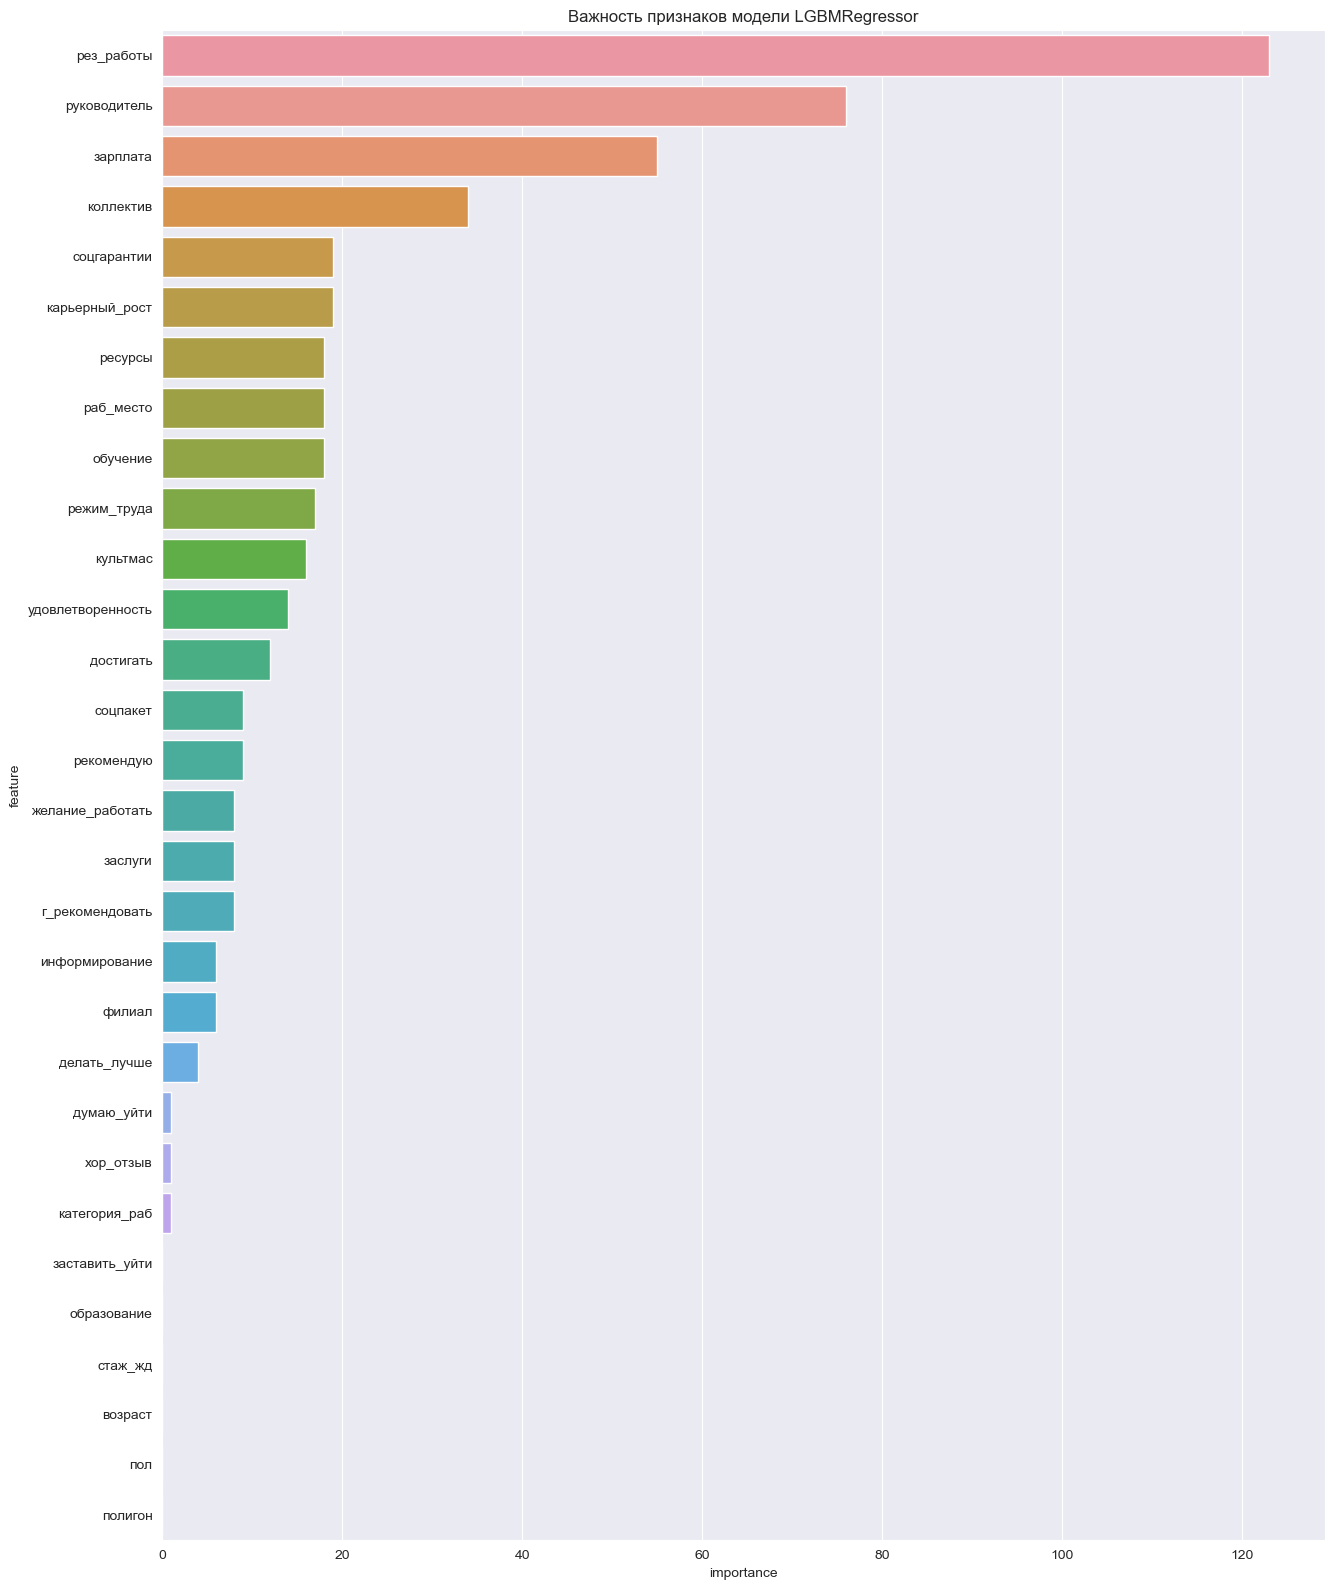

In [97]:
importance(model_lgbm, features_train, 'LGBMRegressor')

Для модели LGBMRegressor самым важным признаком оказался также __зависимость оплаты труда от результатов работы__, также важными для предсказания модель выделила __отношение непосредственного руководителя__ и __уровень заработной платы__

## CatBoostRegressor

CatBoost — открытая программная библиотека, разработанная компанией Яндекс и реализующая алгоритм построения моделей машинного обучения, использующий одну из оригинальных схем градиентного бустинга.

In [98]:
model_cbr = CatBoostRegressor(loss_function="RMSE", iterations=10, verbose=10)

categorical=[]

model_cbr.fit(features_train, target_train, cat_features=categorical)
predicted_valid = model_cbr.predict(features_valid)
rmse_cbr = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель CatBoostRegressor: RMSE = {:.2f}'.format(rmse_cbr))

Learning rate set to 0.5
0:	learn: 9.7781167	total: 67.2ms	remaining: 604ms
9:	learn: 2.1316432	total: 99.9ms	remaining: 0us
Модель CatBoostRegressor: RMSE = 2.17


Попробуем подобрать гиперпараметры с помощью GridSearchCV

In [99]:
model_cbr_gr = CatBoostRegressor()
parametrs_cbr = {
    'iterations': [10, 50, 100],
    'max_depth' : [10, 15],
    'random_state': [12345],
    'verbose' : [50]
}
grid_cbr = GridSearchCV(model_cbr_gr, param_grid=parametrs_cbr, cv=3, scoring='neg_mean_squared_error')

In [100]:
grid_cbr.fit(features_train, target_train)

Learning rate set to 0.5
0:	learn: 9.2931928	total: 6.42ms	remaining: 57.8ms
9:	learn: 1.7700112	total: 63.4ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.3422095	total: 6.09ms	remaining: 54.8ms
9:	learn: 1.8139112	total: 59.1ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.2793668	total: 5.47ms	remaining: 49.2ms
9:	learn: 1.7761281	total: 58.3ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.4453201	total: 56.7ms	remaining: 510ms
9:	learn: 1.6112819	total: 477ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.4985804	total: 32.5ms	remaining: 292ms
9:	learn: 1.6422069	total: 437ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.4254429	total: 31.8ms	remaining: 286ms
9:	learn: 1.6484710	total: 466ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.2931928	total: 4.91ms	remaining: 240ms
49:	learn: 1.0355922	total: 299ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.3422095	total: 5.4ms	remaining: 265ms
49:	learn: 1.0559841	total: 297ms	remaining: 0us
L

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fcce81c57c0>,
             param_grid={'iterations': [10, 50, 100], 'max_depth': [10, 15],
                         'random_state': [12345], 'verbose': [50]},
             scoring='neg_mean_squared_error')

In [101]:
print(grid_cbr.best_params_)

print('MSE = {:.2f}'.format(grid_cbr.best_score_))

{'iterations': 50, 'max_depth': 10, 'random_state': 12345, 'verbose': 50}
MSE = -4.01


In [102]:
model_cbr = CatBoostRegressor(loss_function="RMSE", iterations=50, max_depth=10, random_state=12345, verbose=50)

categorical=[]

model_cbr.fit(features_train, target_train, cat_features=categorical)
predicted_valid = model_cbr.predict(features_valid)
rmse_cbr = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель CatBoostRegressor: RMSE = {:.2f}'.format(rmse_cbr))

Learning rate set to 0.5
0:	learn: 9.2604623	total: 7.5ms	remaining: 368ms
49:	learn: 1.1530720	total: 377ms	remaining: 0us
Модель CatBoostRegressor: RMSE = 1.91


Метрика улучшилась

Подберем гиперпараметры с помощью Hyperopt с целью лучшего прогноза модели

In [103]:
def hyperopt_score_cbr(params):
    model = CatBoostRegressor(**params)
    current_score = cross_val_score(
        model,
        features_train,
        target_train,
        scoring = 'neg_mean_squared_error',
        cv = 3
    ).mean()
    print(current_score, params)
    return current_score

In [104]:
simple_space_cbr = {
    'iterations' : hp.choice('iterations', range(50, 500)),
    'max_depth' : hp.choice('max_depth', range(1, 15)),

#     'random_state': [12345],
#     'verbose' : [50]
}

In [105]:
trials_cbr = Trials()
best_cbr = fmin(
    fn = hyperopt_score_cbr,
    space = simple_space_cbr,
    algo = tpe.suggest,
    max_evals = 10,
    trials=trials_cbr,
    show_progressbar=True,
)

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]Learning rate set to 0.140656
0:	learn: 14.0059008	total: 3.79ms	remaining: 1.61s
1:	learn: 12.4646838	total: 7.26ms	remaining: 1.54s
2:	learn: 11.0977432	total: 10.7ms	remaining: 1.5s
3:	learn: 9.8747994	total: 13.5ms	remaining: 1.43s
4:	learn: 8.8048065	total: 16.7ms	remaining: 1.41s
5:	learn: 7.8554941	total: 20.4ms	remaining: 1.43s
6:	learn: 7.0130232	total: 23.6ms	remaining: 1.41s
7:	learn: 6.2774128	total: 26.7ms	remaining: 1.4s
8:	learn: 5.6399323	total: 29.8ms	remaining: 1.38s
9:	learn: 5.0942468	total: 32.8ms	remaining: 1.37s
10:	learn: 4.6122605	total: 35.7ms	remaining: 1.35s
11:	learn: 4.1873670	total: 38.6ms	remaining: 1.34s
12:	learn: 3.8038899	total: 42.2ms	remaining: 1.34s
13:	learn: 3.4696792	total: 45.1ms	remaining: 1.33s
14:	learn: 3.1912241	total: 47.8ms	remaining: 1.31s
15:	learn: 2.9646294	total: 51.4ms	remaining: 1.32s
16:	learn: 2.7567484	total: 54.4ms	remaining: 1.31s
17:	learn: 2.5840049	total: 57.4ms	remain

In [106]:
model_cbr = CatBoostRegressor(loss_function="RMSE", iterations=317, max_depth=2, random_state=12345, verbose=50) # 84/6

categorical=[]

start = time.time()
model_cbr.fit(features_train, target_train, cat_features=categorical)
end = time.time()
time_fit_cbr = end-start

predicted_valid = model_cbr.predict(features_valid)
rmse_cbr = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель CatBoostRegressor: RMSE = {:.2f}'.format(rmse_cbr))
print('Время обучения модели = {:.2f} сек.'.format(time_fit_cbr))

Learning rate set to 0.191054
0:	learn: 14.1176436	total: 2.27ms	remaining: 719ms
50:	learn: 1.8977575	total: 118ms	remaining: 613ms
100:	learn: 1.7642239	total: 235ms	remaining: 502ms
150:	learn: 1.7275177	total: 347ms	remaining: 382ms
200:	learn: 1.7118051	total: 460ms	remaining: 266ms
250:	learn: 1.7025773	total: 570ms	remaining: 150ms
300:	learn: 1.6956143	total: 679ms	remaining: 36.1ms
316:	learn: 1.6931925	total: 717ms	remaining: 0us
Модель CatBoostRegressor: RMSE = 1.68
Время обучения модели = 0.76 сек.


Получилось еще улучшить предсказание модеи

,feature,importance
0,рез_работы,15.30
1,руководитель,13.44
2,заслуги,12.63
3,режим_труда,11.68
4,ресурсы,10.75


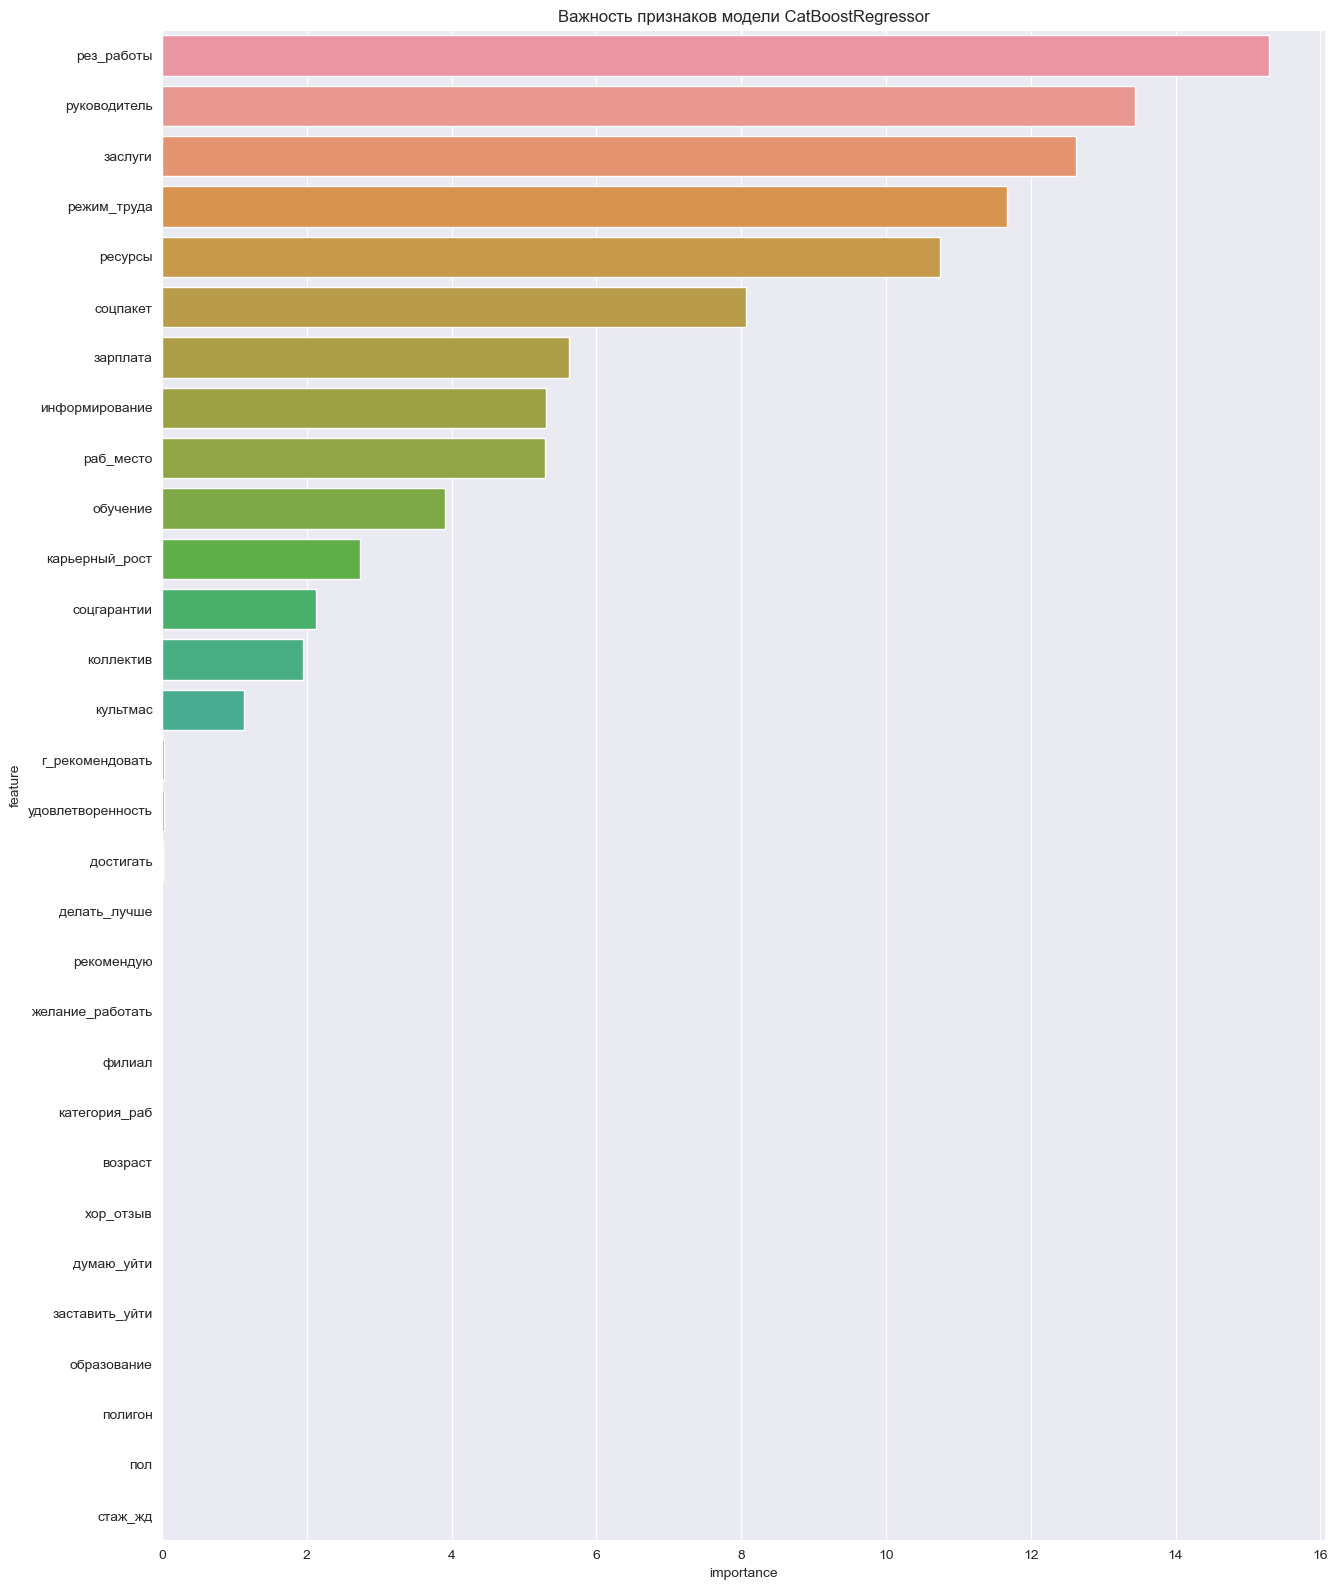

In [107]:
importance(model_cbr, features_train, 'CatBoostRegressor')

Для модели CatBoostRegressor также важным признаком является __зависимость оплаты труда от результатов работы__, но также сильно важны и еще ряд признаков.

## DummyRegressor

In [108]:
model_dm = DummyRegressor(strategy='mean')

start = time.time()
model_dm.fit(features_train, target_train)
end = time.time()
time_fit_dm = end-start

predicted_valid = model_dm.predict(features_valid)
rmse_dm = np.sqrt(mean_squared_error(target_valid, predicted_valid))

print('Модель DummyRegressor: RMSE = {:.2f}'.format(rmse_dm))
print('Время обучения модели = {:.2f} сек.'.format(time_fit_dm))

Модель DummyRegressor: RMSE = 15.87
Время обучения модели = 0.00 сек.


DummyRegressor - это константная модель, она служит для проверки актуальности наших моделей. Есть ли необходимость в модели машинного обучения или возможно просто каждому сотруднику предсказывать среднее значение. Но среднее значение показало хуже мерику, чем модели выше.

## Результаты моделей на валидацонной выборке

In [109]:
values_models_valid = pd.DataFrame([
    ['RandomForestRegressor', rmse_rf, time_fit_rf, 'valid'],
    ['LGBMRegressor', rmse_lgbm, time_fit_lgbm, 'valid'],
    ['CatBoostRegressor', rmse_cbr, time_fit_cbr, 'valid'],
    ['DummyRegressor', rmse_dm,time_fit_dm, 'valid']
],
    columns=['Модель', 'Метрика_RMSE', 'Время_обучения', 'Выборка']
)
values_models_valid

,Модель,Метрика_RMSE,Время_обучения,Выборка
0,RandomForestRegressor,2.62,56.52,valid
1,LGBMRegressor,1.72,0.49,valid
2,CatBoostRegressor,1.68,0.76,valid
3,DummyRegressor,15.87,0.00,valid


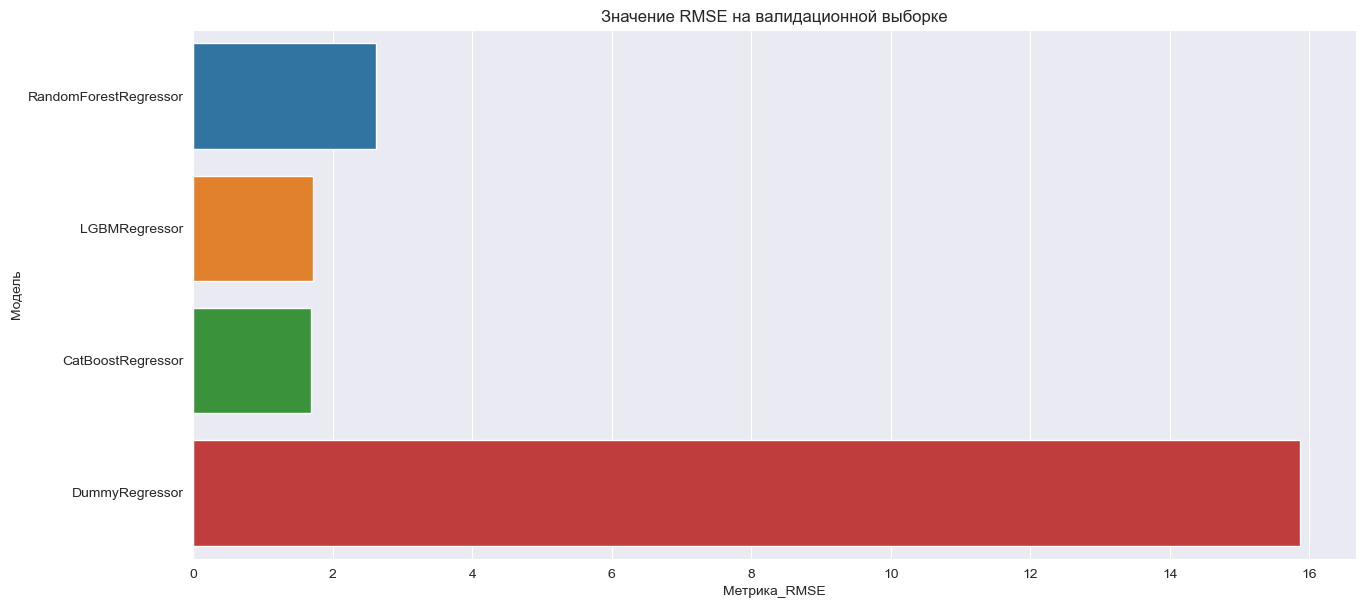

In [110]:
plt.figure(figsize=(15,7), dpi=100)
sns.set_style('darkgrid')
sns.barplot(x='Метрика_RMSE', y='Модель', data=values_models_valid)
plt.title('Значение RMSE на валидационной выборке')

plt.show()

Мы обучили модели на обучающей выборке и проверили предсказания моделей на валидационной выборке. Также мы замеряли время, затраченное моделью на обучение.

Наилучший результат (наименьшее отклонение предсказанного значения от целевого-реального) показала модель CatBoostRegressor, сопоставимы результат у модели LGBMRegressor при этом данная модель чуть быстрее обучается. Модель  RandomForestRegressor показала результат хуже, как в предсказании, так и по времени обучения.  
Все опробованные модели релевантны, так как константная модель DummyRegressor, предсказывающая всегда среднее значение целевого показателя, сильнее всех отклоняется от целевого значения.

# Тестирование моделей

С целью обчения моделей на большем количестве данных, объединим обучающую и валидационную выборки

In [111]:
features_total = pd.concat([features_train] + [features_valid])
display(features_train.shape)
display(features_valid.shape)
features_total.shape

(46419, 30)

(15473, 30)

(61892, 30)

In [112]:
target_total = pd.concat([target_train] + [target_valid])
display(target_train.shape)
display(target_valid.shape)
target_total.shape

(46419,)

(15473,)

(61892,)

## RandomForestRegressor

In [113]:
model_rf.fit(features_total, target_total)

start = time.time()
predicted_test = model_rf.predict(features_test)
end = time.time()
time_predict_rf = end-start

rmse_rf_test_up = np.sqrt(mean_squared_error(target_test, predicted_test))

print('Модель RandomForestRegressor: RMSE = {:.2f}'.format(rmse_rf_test_up))
print('Время выполнения предсказания модели = {:.2f} сек.'.format(time_predict_rf))

Модель RandomForestRegressor: RMSE = 2.66
Время выполнения предсказания модели = 0.75 сек.


## LGBMRegressor

In [114]:
features_total_lgbm = features_total.set_axis(
    ['poligon', 'filial', 'categoria_rab', 'pol', 'vozrast', 'stazh_zd', 'obrazovanie', 'udovletvorennost',\
    'zhelanie_rabotat', 'g_recommendovat', 'hor_otzyv', 'recommend', 'zastavit_uti', 'dumau_uti', 'delat_luchshe', \
     'dostigat', 'rab_mesto', 'resursy', 'rezhim_truda', 'zarplata', 'rez_raboty', 'socpacet', 'socgarantii', \
     'obuchenie', 'career_rost', 'rukovoditel', 'collectiv', 'kultmas', 'zaslugi', 'informirovanie'
    ], 
    axis='columns'
)

In [115]:
model_lgbm.fit(features_total_lgbm, target_total)

start = time.time()
predicted_test_lgbm_up = model_lgbm.predict(features_test)
end = time.time()
time_predict_lgbm = end-start

rmse_lgbm_test_up = np.sqrt(mean_squared_error(target_test, predicted_test_lgbm_up))

print('Модель LGBMRegressor (тестовая выборка): RMSE = {:.2f}'.format(rmse_lgbm_test_up))
print('Время выполнения предсказания модели = {:.2f} сек.'.format(time_predict_lgbm))

Модель LGBMRegressor (тестовая выборка): RMSE = 1.76
Время выполнения предсказания модели = 0.03 сек.


## CatBoostRegressor

In [116]:
model_cbr.fit(features_total, target_total)

start = time.time()
predicted_test_cbr_up = model_cbr.predict(features_test)
end = time.time()
time_predict_cbr = end-start

rmse_cbr_test_up = np.sqrt(mean_squared_error(target_test, predicted_test_cbr_up))

print('Модель CatBoostRegressor (тестовая выборка): RMSE = {:.2f}'.format(rmse_cbr_test_up))
print('Время выполнения предсказания модели = {:.2f} сек.'.format(time_predict_cbr))

Learning rate set to 0.199939
0:	learn: 14.0526045	total: 3.5ms	remaining: 1.11s
50:	learn: 1.9142327	total: 148ms	remaining: 773ms
100:	learn: 1.7679198	total: 287ms	remaining: 615ms
150:	learn: 1.7268185	total: 426ms	remaining: 468ms
200:	learn: 1.7085062	total: 563ms	remaining: 325ms
250:	learn: 1.6982152	total: 698ms	remaining: 184ms
300:	learn: 1.6910011	total: 837ms	remaining: 44.5ms
316:	learn: 1.6890672	total: 880ms	remaining: 0us
Модель CatBoostRegressor (тестовая выборка): RMSE = 1.73
Время выполнения предсказания модели = 0.00 сек.


## DummyRegressor

In [117]:
model_dm.fit(features_total, target_total)

start = time.time()
predicted_test_dm_up = model_dm.predict(features_test)
end = time.time()
time_predict_dm = end-start

rmse_dm_test_up = np.sqrt(mean_squared_error(target_test, predicted_test_dm_up))

print('Модель DummyRegressor (тестовая выборка): RMSE = {:.2f}'.format(rmse_dm_test_up))
print('Время выполнения предсказания модели = {:.2f} сек.'.format(time_predict_dm))

Модель DummyRegressor (тестовая выборка): RMSE = 15.88
Время выполнения предсказания модели = 0.00 сек.


## Результаты моделей на тестовой выборке

In [118]:
values_models_test = pd.DataFrame([
    ['RandomForestRegressor', rmse_rf_test_up, time_predict_rf, 'test'],
    ['LGBMRegressor', rmse_lgbm_test_up, time_predict_lgbm, 'test'],
    ['CatBoostRegressor', rmse_cbr_test_up, time_predict_cbr, 'test'],
    ['DummyRegressor', rmse_dm_test_up,time_predict_dm, 'test']
],
    columns=['Модель', 'Метрика_RMSE', 'Время_предсказания', 'Выборка']
)
values_models_test

,Модель,Метрика_RMSE,Время_предсказания,Выборка
0,RandomForestRegressor,2.66,0.75,test
1,LGBMRegressor,1.76,0.03,test
2,CatBoostRegressor,1.73,0.00,test
3,DummyRegressor,15.88,0.00,test


Результаты идентичны результатам на валидационной выборке. Так как значение метрики практически не ухудшилось - это говорит нам, что модели не переобучились на обучающей выборке и достаточно гибкие для выполнения точных предсказаний на новых данных.  

Также мы измерили время, которое модель тратит на выполнения предсказания.

In [119]:
values_models = pd.concat([values_models_valid] + [values_models_test])

In [120]:
values_models_total = values_models_valid[['Модель', 'Метрика_RMSE', 'Время_обучения']].merge(
    values_models_test[['Метрика_RMSE', 'Время_предсказания']],
    on=values_models_valid.index,
    how='left'
)

In [121]:
values_models_total.drop(columns='key_0', axis=1, inplace=True)
values_models_total.rename(
    columns={'Метрика_RMSE_x': 'Метрика_RMSE_валид', 'Метрика_RMSE_y': 'Метрика_RMSE_тест'}, 
    inplace=True
)

values_models_total

,Модель,Метрика_RMSE_валид,Время_обучения,Метрика_RMSE_тест,Время_предсказания
0,RandomForestRegressor,2.62,56.52,2.66,0.75
1,LGBMRegressor,1.72,0.49,1.76,0.03
2,CatBoostRegressor,1.68,0.76,1.73,0.00
3,DummyRegressor,15.87,0.00,15.88,0.00


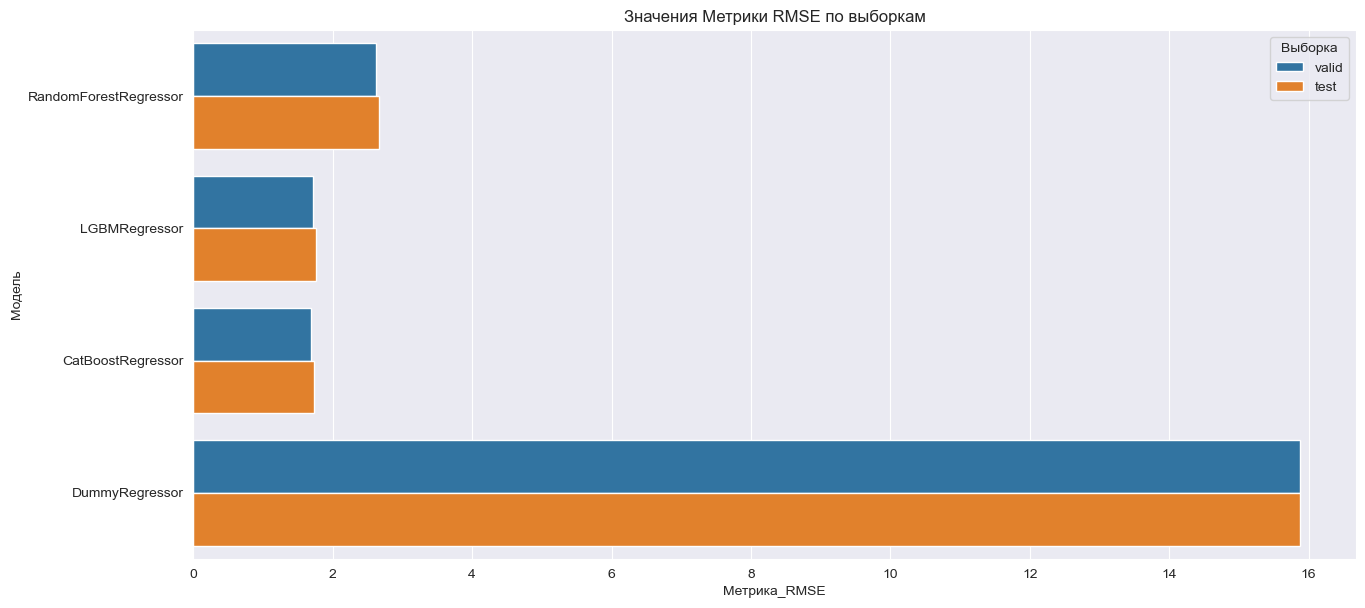

In [122]:
plt.figure(figsize=(15,7), dpi=100)
sns.set_style('darkgrid')
sns.barplot(y='Модель', x='Метрика_RMSE', data=values_models, hue='Выборка')
plt.title('Значения Метрики RMSE по выборкам')


plt.show()

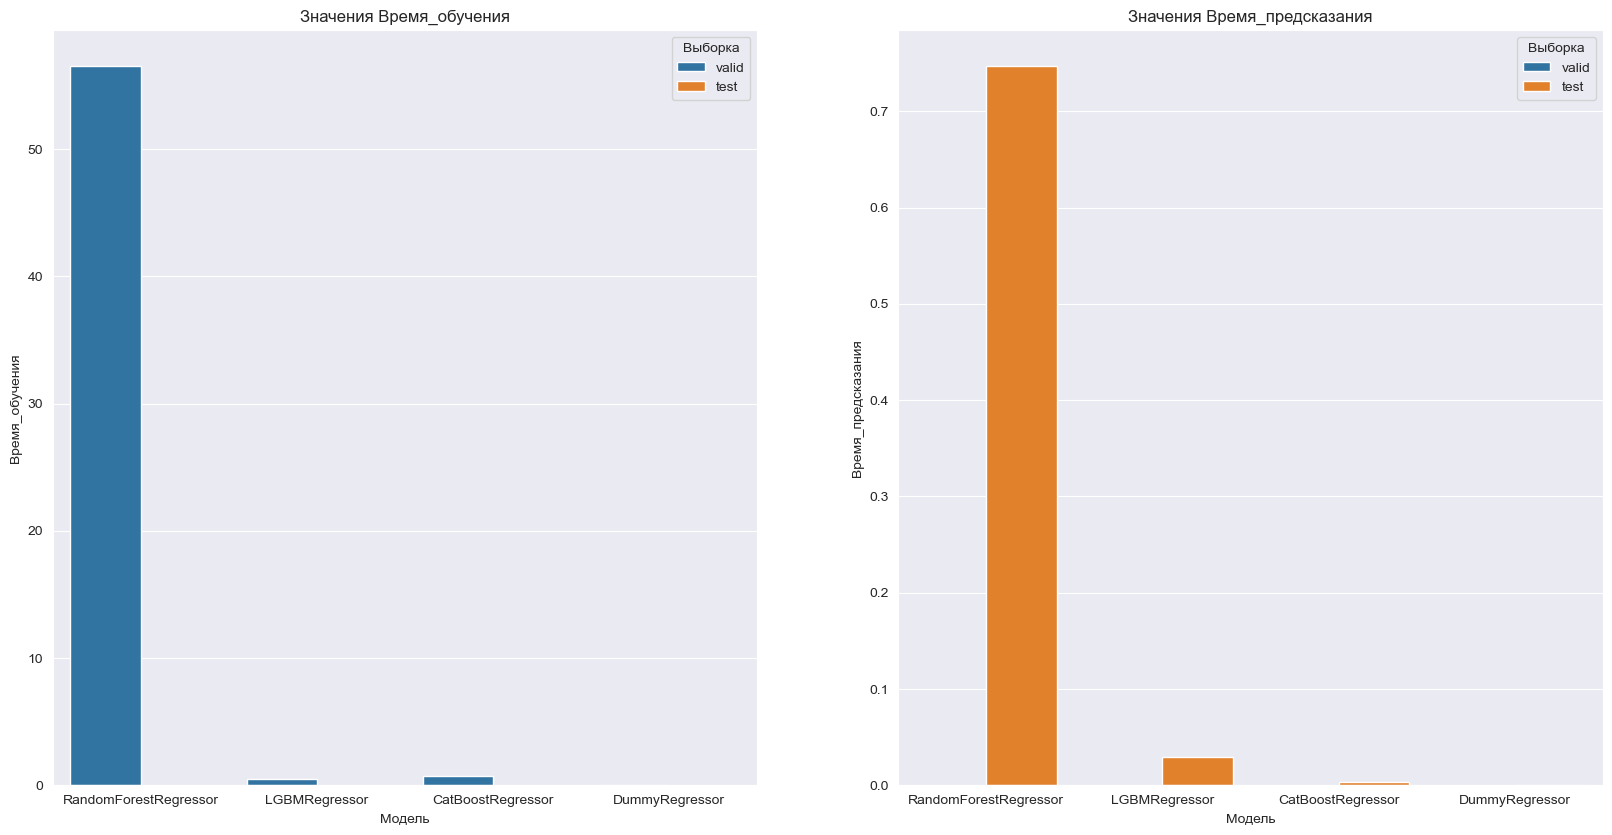

In [123]:
plt.figure(figsize=(20,10), dpi=100)
sns.set_style('darkgrid')

plt.subplot(121)
sns.barplot(x='Модель', y='Время_обучения', data=values_models, hue='Выборка')
plt.title('Значения Время_обучения')

plt.subplot(122)
sns.barplot(x='Модель', y='Время_предсказания', data=values_models, hue='Выборка')
plt.title('Значения Время_предсказания')


plt.show()

Привлекательнее выглядит модель CatBoostRegressor, так как именно она показала наилучший показатель метрики. Данная модель чуть дольше обучается, чем LGBMRegressor, при этом CatBoostRegressor чуть быстрее выполняет предсказания, что выполняется чаще, чем обучение модели.

In [124]:
table = pd.DataFrame(
    data={
        'целевое_значение': target_test.reset_index(drop=True), 
        'предсказанное_значение': pd.Series(predicted_test_cbr_up)}
)

In [125]:
table['дельта'] = abs(table['целевое_значение'] - table['предсказанное_значение'])

Для наглядности выведем первые 25 целевых и предсказанных значений.   
Действительно модель довольно точно предсказывает целевое значение.

In [126]:
table.head(25)

,целевое_значение,предсказанное_значение,дельта
0,76.22,77.07,0.85
1,65.96,68.47,2.51
2,86.96,85.88,1.08
3,98.21,97.94,0.27
4,64.81,63.00,1.81
5,55.88,58.32,2.44
6,62.50,62.13,0.37
7,100.00,100.03,0.03
8,50.68,51.58,0.91
9,100.00,99.98,0.02


Сохраним модель для возможности дальнейшего использования

In [127]:
joblib.dump(model_cbr, 'finalized_model.sav')

['finalized_model.sav']

# Вывод

- получили файл с ответами сотрудников на опрос компании с целью предсказать значения удовлетворенности, вовлеченность, лояльности по ответам пользователей
- предобработали данные (изменили форматы, удалили субъктивно неактуальные столбцы, переименовали название столбцов для лучшего понимания данных, закодировали категориальные признаки, удалили строки с пропущенными значениями, так как они составили всего 2%, проверили на наличие дубликатов)
- исследовали данные для понимания признаков (среди опрошенных больше мужчин, но женщины в основной массе более удовлетворены работой в комании, чем мужчины. Основную массу опрошенных составили рабочие и специалисты, но самыми удовлетворенными оказались руководители. Наибольшее количество опрошенных из Северного и Западно-Сибирского полигонов,  в части функциональных филиалов это ЦДИ и ЦТ, в разрезе возраста это 36-45 лет, большинство с высшим образованием, также большинство оценили удовлетворенность работой в компании и готовность порекомендовать работать в компании на максимальные 100%. Также выявили, что с целевым значением удовлетворенности сильней остальных коррелируют признаки _зависимость оплаты труда от результатов работы_ и _отношение непосредственного руководителя_)
- выделили три целевых значения (удовлетворенность, вовлеченность, лояльность), на текущий момент отработали удовлетворенность и определились с метрикой RMSE
- обучили три модели RandomForestRegressor, LGBMRegressor, CatBoostRegressor, также константную модель DummyRegressor, замерили скорость обучения и предсказания моделей
- в результате выделили наилучшую модель CatBoostRegressor с наименьшим показателем метрики и наилучшей скоростью предсказания, модель LGBMRegressor имеет сопоставимые показатели - чуть выше значение метрики, но меньше времени обучения модели. У всех моделей наиболее важными признаками оказались те признаки, которые сильней остальных коррелировали с целевым значением. В среднем предсказания нашей модели на тестовой выборке отклонились на 1,73 единицы измерения, что довольно точный результат